# Übungen zu Teilchenphysik I
## Exercise 03 - EMCal in a nutshell

    D. Wong, November 2024                                                

## Setup

It is very likely that you will need the following packages, so don't forget to import them!

In [1]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
# This is a local module that will be necessary for the sections 2 and 3: it's already provided in this repository
import exercise3_utils as ex3

<a name='section_1_0'></a>
<hr style="height: 1px;">


## <h1 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #FFA500">Section 1: Electromagnetic cascades in a calorimeter</h1>


<div style="text-align: center; font-family: 'Arial', sans-serif; font-size: 24px; line-height: 1.5; color: yellow; background-color: black; padding: 20px;">
    <img src="https://static1.cbrimages.com/wordpress/wp-content/uploads/2022/05/Darth-Varder-Lightning.jpg?q=50&fit=crop&w=1140&h=&dpr=1.5" alt="Darth Vader" width="300" style="float: left; margin-right: 10px;">

<p style="font-size: 34px; font-weight: bold;">Anakin Skywalker was weak. He didn't know the power EM showers.</p>

<p style="text-align: right; font-size: 24px; font-style: italic; margin-top: 40px;">– Anakin himself</p>
</div>


An **electromagnetic (EM) shower** is a cascade of particles, including photons, electrons, and positrons, produced when a high-energy electron, positron, or photon enters a material.

![EMShower](https://www.aanda.org/articles/aa/full/2003/43/aaINTEGRAL41/img17.gif)



<a name='section_1_1'></a>
<hr style="height: 1px;">


## <h3 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #FFA500">Problem 1.1: EMCal dimension estimation</h3>

**Electromagnetic calorimeters (EMCal)** designed to measure EM showers use high-Z materials to trap the shower. The electrons in the shower produce scintillation light, and the amount of light collected is proportional to the total energy of the incident particles. This makes EMCal ideal for precisely measuring the energy of electrons, positrons and photons.

The CMS detector at the LHC uses lead tungstate (PbWO$_4$) as the EMCal material.

<div class="alert alert-info">
<strong>Exercise:</strong> 
Calculate the radiation length and critical energy of PbWO$_4$ (its effective atomic number is Z = 68.35)</span>
</div>

In [2]:
import math

Z_Pb = 82
A_Pb = 207
density_Pb = 11.34

X_0_Pb = 716.4 * A_Pb / (Z_Pb * (Z_Pb + 1) * math.log(287 / math.sqrt(Z_Pb)))
print(f"The radiation length for Pb is {X_0_Pb} g/cm²")

Z_PbWO4 = 68.35
E_c_PbWO4 = 800 / Z_PbWO4
print(f"The critical energy for PbW04 is {E_c_PbWO4} MeV")

The radiation length for Pb is 6.304415656997026 g/cm²
The critical energy for PbW04 is 11.704462326261888 MeV


The effective atomic number and Thomson’s approximation cannot produce a good estimation for the radiation length and the critical energy.

Consuld the PDG website (https://pdg.lbl.gov/2024/AtomicNuclearProperties/) to get more precise values for both radiation length and critical energy for PbWO$_4$ (note that lead tungstate is an inorganic scintillator).

<div class="alert alert-info">
<strong>Exercise:</strong> 
Calculate the approximate dimension of PbWO$_4$ crystal (longitudinal depth and transverse width) for a 100 GeV electron </span>
</div>

In [3]:
E = 100000

density = 8.3
X_0 = 7.39
E_c = 9.64

moliere_radius = (21 / E_c) * X_0 / density
width = 2 * moliere_radius
print(f'The Moliere radius of a shower generated by a {E/1000} GeV electron is {moliere_radius} cm')
print(f'The width of a shower generated by a {E/1000} GeV electron is {width} cm')

x_max = math.log(E/E_c)/math.log(2)
length = x_max * X_0 / density
print(f'The x_max of a shower generated by a {E/1000} GeV electron is {length} cm')

The Moliere radius of a shower generated by a 100.0 GeV electron is 1.939584062390641 cm
The width of a shower generated by a 100.0 GeV electron is 3.879168124781282 cm
The x_max of a shower generated by a 100.0 GeV electron is 11.877962428166727 cm


<div class="alert alert-info">
<strong>Exercise:</strong> 
Is this a good estimation for EMCal size? CMS EMCal crystals are actually 25 $X_0$ long—why?</span>
</div>

In [4]:
# We want to measure the entire electromagnetic shower: to cover the whole shower we need redundancy, otherwise the shower
# "leaks" outside the crystal and we miss part of it.

<a name='section_1_2'></a>
<hr style="height: 1px;">


## <h3 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #FFA500">Problem 1.2: Shape of muon clusters on EMCal</h3>

For bremsstrahlung process, the energy loss through distance is given by $-\frac{dE}{dx} \propto \frac{Z^2 E}{m_{particle}^2}$.

<div class="alert alert-info">
<strong>Exercise:</strong> 
Consider a muon with a momentum of 50 GeV. What is the shape of the shower on an EMCal? How do you expect the energy deposit to be distributed on an EMCal?</span>
</div>

In [5]:
# A 50 GeV muon is still a MIP. We expect a point-like EMCal with very little energy deposit (narrow peak near 0 GeV)

<div class="alert alert-info">
<strong>Exercise:</strong> 
Knowing at what energy electrons and positrons start emitting significant bremsstrahlung (what energy?), determine the threshold energy for a muon to emit significant bremsstrahlung in a PbWO$_4$ EMCal.</span>
</div>

In [6]:
# The energy at which electrons and positrons start emitting significant energy via bremsstrahlung is the critical energy.
# Let's consider PbWO4: we already got from PDG that the critical energy for an electron is 9.64 MeV in.
muon_mass = 105  # MeV
electron_mass = 0.511  # MeV
ratio2 = (muon_mass / electron_mass)**2
E_c_muon = ratio2 * E_c  # MeV
print(f'The critical energy for a muon in PbWO4 is {E_c_muon / 1000} GeV')

The critical energy for a muon in PbWO4 is 407.0182022893601 GeV


<a name='section_1_3'></a>
<hr style="height: 1px;">


## <h3 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #FFA500">Problem 1.3: Detector proposal</h3>

<div class="alert alert-info">
<strong>Exercise:</strong> 
Imagine that a few years from now you are a principal investigator. How would you implement the identification of electrons from photons and muons?</span>
</div>

In [7]:
# Electrons and muons can be distinguished via an electromagnetic calorimeter.
# Electrons and photons look identical in an EMCal: we need a charged particle tracker to find the tracks left by the electrons.

<a name='section_2_0'></a>
<hr style="height: 1px;">


## <h1 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #FFA500">Section 2: Calorimetry and reconstruction</h1>


The EMCal at the PHENIX experiment has in total, 2592 towers or channels to read out the energy deposits. The channels are arranged in a (72 x 36) matrix. For more details, please refer to the documentation.

Use the following code snippet to read one event from the EMCal simulation:

```
# Example to obtain EMCal hits
elmID, edep = ex3.get_hit_data()
edep = edep/ex3.sfc  # This converts the energy depositions into GeV
```

In the rest of the exercise, whenever you are asked to work with the simulated events from the PHENIX EMCal, please remember to always conver the energy depositions as above using `ex3.sfc`!

<a name='section_2_1'></a>
<hr style="height: 1px;">


## <h3 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #FFA500">Problem 2.1: Events visualization and distribution</h3>

The `elmID` is the index of the channel that received an hit and `edep` is the energy deposition measured for a hit in the given channel. To reconstruct the energy of the particle, you need to convert `elmID` into 2D spatial coordinates. Also, the energy deposited in the EMCal should be divided by a sampling fraction constant (`ex3.sfc`).

<div class="alert alert-info">
<strong>Exercise:</strong> 
Write an algorithm that converts the channel ID into a pair of X and Y coordinates (in cm) according to the geometry of the PHENIX EMCal.</span>
</div>

In [8]:
def map_channels_energies_to_matrix(channels, energies, n_rows=72, n_columns=36):
    # This function does not map into spatial coordinates: useful to cross-check the results
    shape = (n_rows, n_columns)
    matrix = np.zeros(shape, dtype=float)
    i_rows, i_columns = np.unravel_index(channels, shape)
    matrix[i_rows, i_columns] = energies
    return matrix.T


def channel_to_spatial_coordinates(channels, n_rows=72, n_columns=36, channel_size=5.535):
    shape = (n_rows, n_columns)
    i_rows, i_columns = np.unravel_index(channels, shape)
    x = (i_rows - n_rows / 2) * channel_size
    y = (n_columns / 2 - i_columns) * channel_size
    return np.column_stack((x, y))

<div class="alert alert-info">
<strong>Exercise:</strong> 
Plot the 2D distribution of all hits in an event according to their X and Y coordinates and their energy deposition. For example, show event 5 from the electron sample.</span>
</div>

Enter sample type (electron or dielectron): electron
Enter event number (0-9): 5


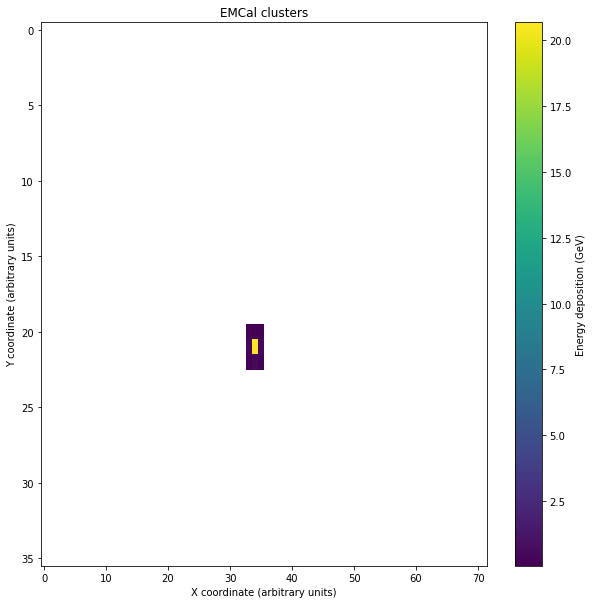

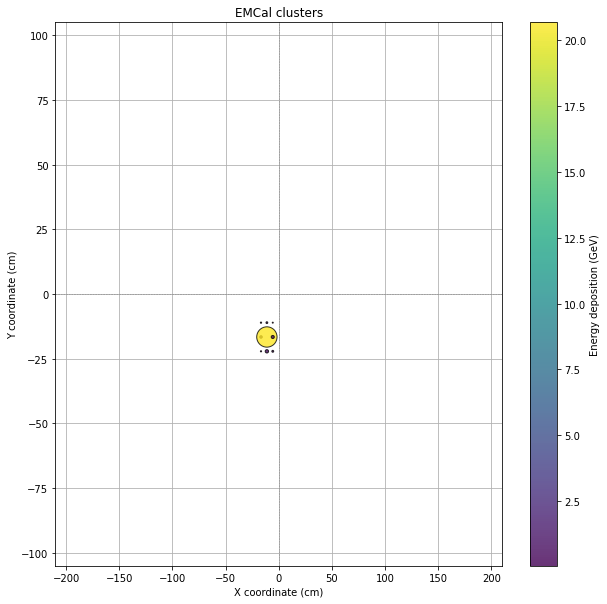

In [9]:
def plot_simple_energy_matrix(matrix, title="EMCal clusters", color_map="viridis"):
    import matplotlib  # noqa
    masked_matrix = np.ma.masked_where(matrix == 0, matrix)
    cmap = matplotlib.colormaps.get_cmap(color_map)
    cmap.set_bad(color='white')
    plt.figure(figsize=(10, 10))
    plt.imshow(masked_matrix, cmap=cmap, aspect='auto')
    plt.colorbar(label="Energy deposition (GeV)")
    plt.title(title)
    plt.xlabel("X coordinate (arbitrary units)")
    plt.ylabel("Y coordinate (arbitrary units)")
    plt.show()


def plot_spatial_energy_matrix(coordinates, energies, centroids=None, labels=None, title="EMCal clusters", marker_size_scale=20, color_map="viridis"):
    x, y = coordinates[:, 0], coordinates[:, 1]
    plt.figure(figsize=(10, 10))
    
    scatter = plt.scatter(
        x, y,
        c=energies,
        s=energies * marker_size_scale,
        cmap=color_map,
        edgecolor="k",
        alpha=0.8
    )
    
    plt.colorbar(scatter, label="Energy deposition (GeV)")
    plt.title(title)
    plt.xlabel("X coordinate (cm)")
    plt.ylabel("Y coordinate (cm)")
    plt.xlim(-210, 210)
    plt.ylim(-105, 105)
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.show()


elmID, edep = ex3.get_hit_data()
edep = edep/ex3.sfc

# Plot without the conversion into spatial coordinates
mapped_matrix = map_channels_energies_to_matrix(elmID, edep)
plot_simple_energy_matrix(mapped_matrix)
# Plot with the conversion into spatial coordinates
coordinates = channel_to_spatial_coordinates(elmID)
plot_spatial_energy_matrix(coordinates, edep)

<div class="alert alert-info">
<strong>Exercise:</strong> 
What is the measured energy of the particle in event 5 of the electron sample? And what is the distribution of all measured energies in all events of the electron sample?</span>
</div>

In [10]:
# The total energy for event 5 is rather trivial:
total_energy = np.sum(edep)
print(f'The total energy is {total_energy} GeV')

The total energy is 22.5846004486084 GeV


<a name='section_2_2'></a>
<hr style="height: 1px;">


## <h3 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #FFA500">Problem 2.2: Cluster properties and moments</h3>

After having measured the energy deposited by all the hits in a cluster, it is important to characterize the cluster and determine its properties. We will use the moments of a distribution to do this. Remember that the clusters we are analyzing are basically 2D distributions!

<div class="alert alert-info">
<strong>Exercise:</strong> 
Using *numpy*, implement functions to calculate the mean (geometric center), width ($\sigma$), standardized skewness and standardized kurtosis for the PHENIX EMCal clusters.</span>
</div>

In [11]:
def f_mean(data):
    return np.mean(data)


def f_width(data):
    return np.std(data, ddof=0)


def f_variance(data):
    return width(data)**2


def f_skewness(data):
    n = len(data)
    mean = f_mean(data)
    width = f_width(data)
    skewness = np.sum((data - mean) ** 3) / (n * (width ** 3))
    return skewness


def f_kurtosis(data):
    n = len(data)
    mean = f_mean(data)
    width = f_width(data)
    kurtosis = np.sum((data - mean) ** 4) / (n * (width ** 4))
    return kurtosis

<div class="alert alert-info">
<strong>Exercise:</strong> 
Visualize again some events from the electron sample and calculate the moments. Which moments look useful for identifying electrons, and why?</span>
</div>

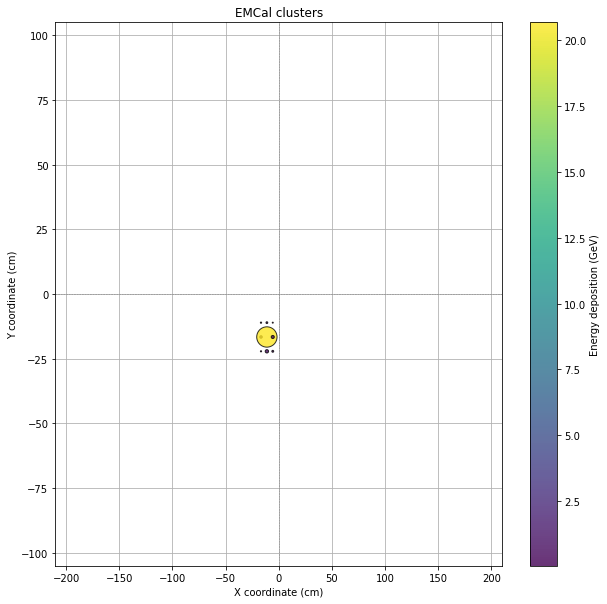

[-16.605 -16.605 -16.605 -11.07  -11.07  -11.07   -5.535  -5.535  -5.535] [-11.07  -16.605 -22.14  -11.07  -16.605 -22.14  -11.07  -16.605 -22.14 ]
Mean: -11.07,-16.605
Width: 4.519308575434963,4.519308575434963
Skewness: 0.0,0.0
Kurtosis: 1.5000000000000007,1.5000000000000007


In [12]:
x = coordinates[:, 0]
y = coordinates[:, 1]

plot_spatial_energy_matrix(coordinates, edep)

print(x, y)
x_mean = f_mean(x)
y_mean = f_mean(y)
print(f'Mean: {x_mean},{y_mean}')
x_width = f_width(x)
y_width = f_width(y)
print(f'Width: {x_width},{y_width}')
x_skewness = f_skewness(x)
y_skewness = f_skewness(y)
print(f'Skewness: {x_skewness},{y_skewness}')
x_kurtosis = f_kurtosis(x)
y_kurtosis = f_kurtosis(y)
print(f'Kurtosis: {x_kurtosis},{y_kurtosis}')

<div class="alert alert-info">
<strong>Exercise:</strong> 
(Optional) Implement functions to calculate skewness and kurtosis without "standardization" and compute them for few events. Why do we usually use the standardized versions?</span>
</div>

In [13]:
def f_skewness_raw(data):
    n = len(data)
    mean = f_mean(data)
    width = f_width(data)
    skewness = np.sum((data - mean) ** 3) / n
    return skewness


def f_kurtosis_raw(data):
    n = len(data)
    mean = f_mean(data)
    width = f_width(data)
    kurtosis = np.sum((data - mean) ** 4) / n
    return kurtosis


print(f'Skewness: {x_skewness},{y_skewness}')
x_skewness_raw = f_skewness_raw(x)
y_skewness_raw = f_skewness_raw(y)
print(f'Raw skewness: {x_skewness},{y_skewness}')
print(f'Kurtosis: {x_kurtosis},{y_kurtosis}')
x_kurtosis_raw = f_kurtosis_raw(x)
y_kurtosis_raw = f_kurtosis_raw(y)
print(f'Raw kurtosis: {x_kurtosis_raw},{y_kurtosis_raw}')

# Since skewness and kurtosis basically compares the behaviour of a distribution w.r.t. a gaussian distribution,
# the standardized values provide useful numbers to interpret. If one looks at the "raw" kurtosis above:
# what 625 means? While 1.5 is easy to interpret.

Skewness: 0.0,0.0
Raw skewness: 0.0,0.0
Kurtosis: 1.5000000000000007,1.5000000000000007
Raw kurtosis: 625.7188548337501,625.7188548337501


<a name='section_3_0'></a>
<hr style="height: 1px;">


## <h1 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #FFA500">Section 3: Calorimetry and clustering</h1>

<a name='section_3_1'></a>
<hr style="height: 1px;">


## <h3 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #FFA500">Problem 3.1: An homemade K-means clustering algorithm</h3>

<div class="alert alert-info">
<strong>Exercise:</strong> 
Visualize the event 0 from the electron sample and the event 6 from the dielectron sample and then compute the relevant moments. Do they still provide a good description for multi-particle cases? Why?</span>
</div>

Enter sample type (electron or dielectron): electron
Enter event number (0-9): 0


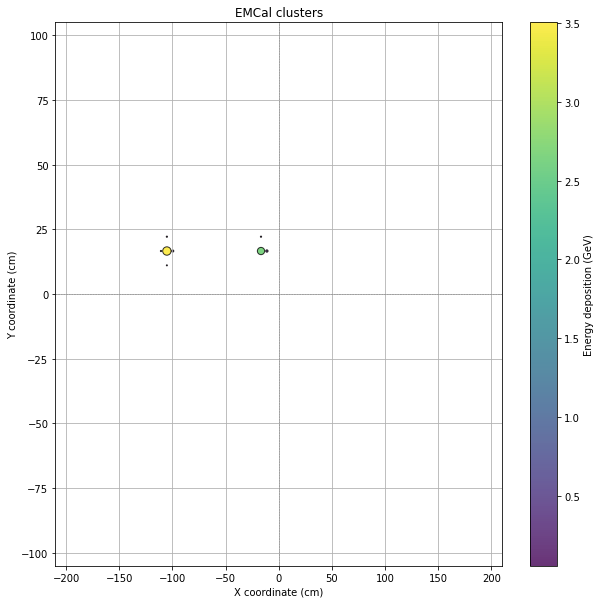

[-110.7   -105.165 -105.165 -105.165  -99.63   -16.605  -16.605  -11.07 ] [16.605 22.14  16.605 11.07  16.605 22.14  16.605 16.605]
Mean: -71.263125,17.296875
Width: 43.883641096191816,3.318115935191988
Skewness: 0.5082547444742873,-0.054395064536627805
Kurtosis: 1.2810543328137625,2.6862003780718333
Enter sample type (electron or dielectron): dielectron
Enter event number (0-9): 6


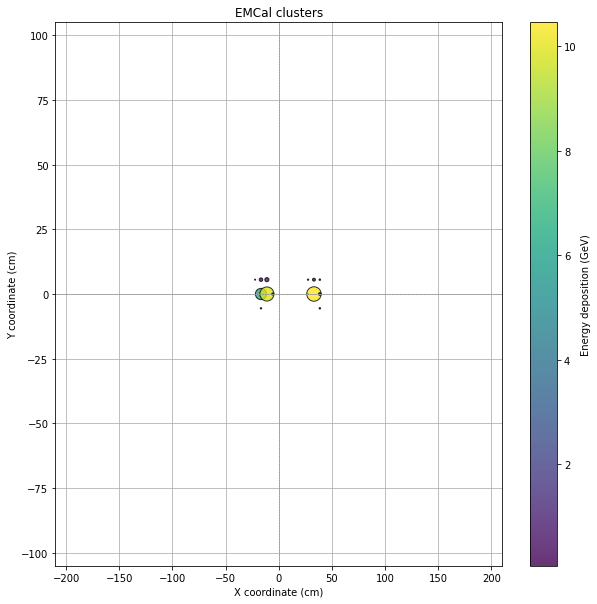

[-22.14  -16.605 -16.605 -16.605 -11.07  -11.07   -5.535  27.675  27.675
  33.21   33.21   38.745  38.745  38.745] [ 5.535  5.535  0.    -5.535  5.535  0.     0.     5.535  0.     5.535
  0.     5.535  0.    -5.535]
Mean: 9.883928571428571,1.5814285714285714
Width: 24.591722778389965,3.8736930646585406
Skewness: -0.009125028744636636,-0.45927932677184563
Kurtosis: 1.1415144108611028,2.1041666666666656


In [14]:
# Event 0, electron
elmID, edep = ex3.get_hit_data()
edep = edep/ex3.sfc

coordinates = channel_to_spatial_coordinates(elmID)

x = coordinates[:, 0]
y = coordinates[:, 1]

plot_spatial_energy_matrix(coordinates, edep)

print(x, y)
x_mean = f_mean(x)
y_mean = f_mean(y)
print(f'Mean: {x_mean},{y_mean}')
x_width = f_width(x)
y_width = f_width(y)
print(f'Width: {x_width},{y_width}')
x_skewness = f_skewness(x)
y_skewness = f_skewness(y)
print(f'Skewness: {x_skewness},{y_skewness}')
x_kurtosis = f_kurtosis(x)
y_kurtosis = f_kurtosis(y)
print(f'Kurtosis: {x_kurtosis},{y_kurtosis}')

# Event 6, dielectron
elmID, edep = ex3.get_hit_data()
edep = edep/ex3.sfc

coordinates = channel_to_spatial_coordinates(elmID)

x = coordinates[:, 0]
y = coordinates[:, 1]

plot_spatial_energy_matrix(coordinates, edep)

print(x, y)
x_mean = f_mean(x)
y_mean = f_mean(y)
print(f'Mean: {x_mean},{y_mean}')
x_width = f_width(x)
y_width = f_width(y)
print(f'Width: {x_width},{y_width}')
x_skewness = f_skewness(x)
y_skewness = f_skewness(y)
print(f'Skewness: {x_skewness},{y_skewness}')
x_kurtosis = f_kurtosis(x)
y_kurtosis = f_kurtosis(y)
print(f'Kurtosis: {x_kurtosis},{y_kurtosis}')

For cases with particle gun decays, we can perform clustering to group the hits associated with different secondary particles produced in the decay.

To test the clustering algorithms and evaluate if they are implemented correctly, you can use the following method to randomly generate a number of clusters with a given number of hits.

```
import ex3
points = ex3.generate_2d_points()
# ex3.generate_2d_points(num_clusters=X, points_per_cluster=Y, spread=Z, random_seed=42)
```

<div class="alert alert-info">
<strong>Exercise:</strong> 
Generate some points with the default settings (without passing arguments) and also with some custom settings and visualize the generated datasets.</span>
</div>

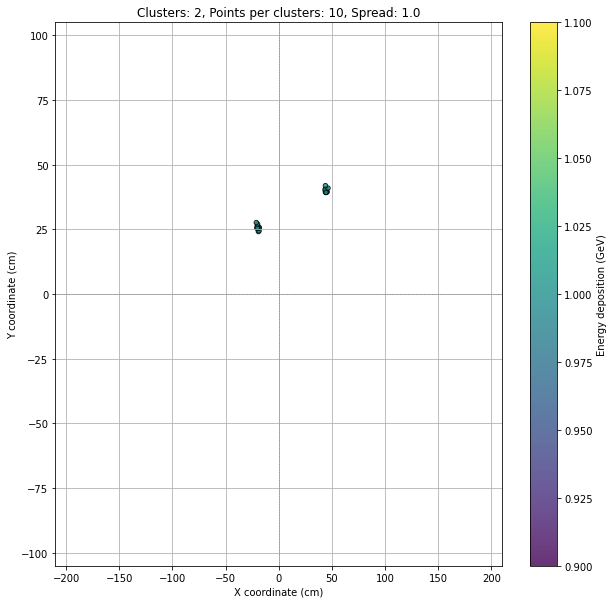

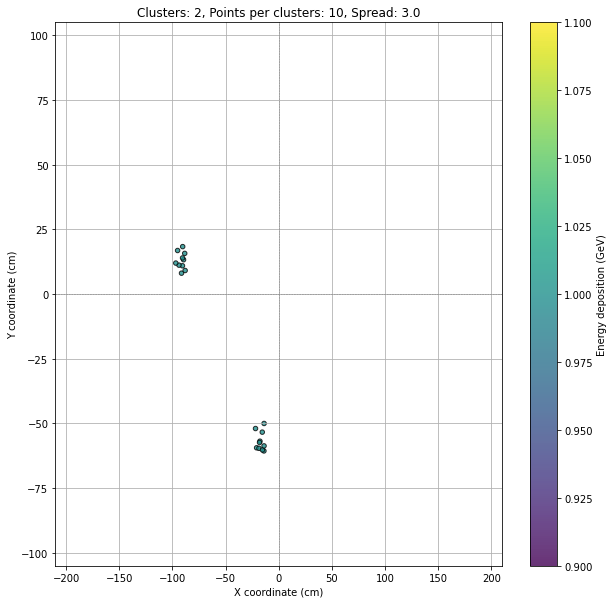

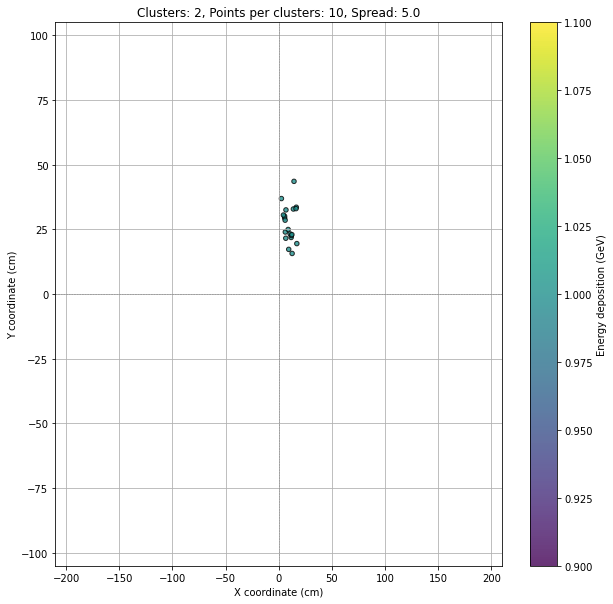

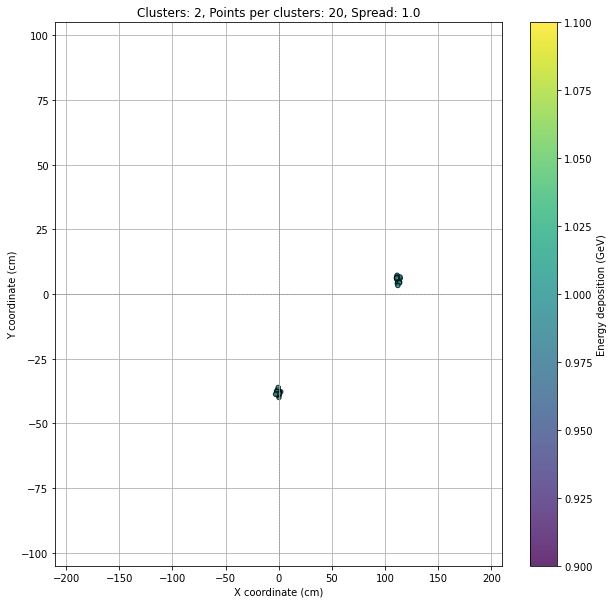

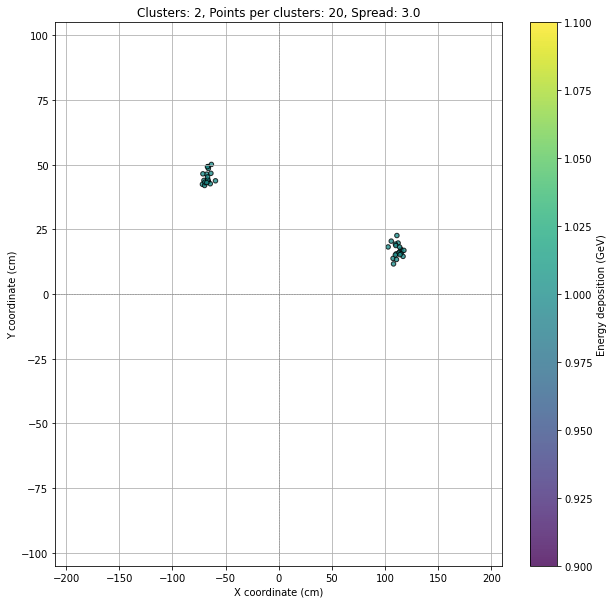

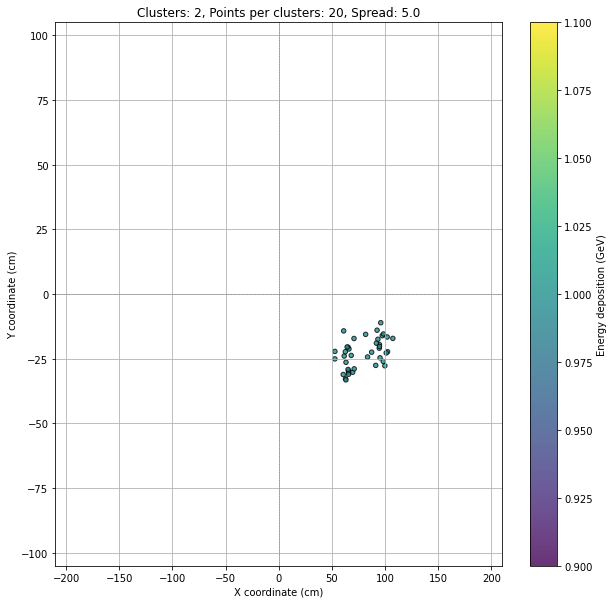

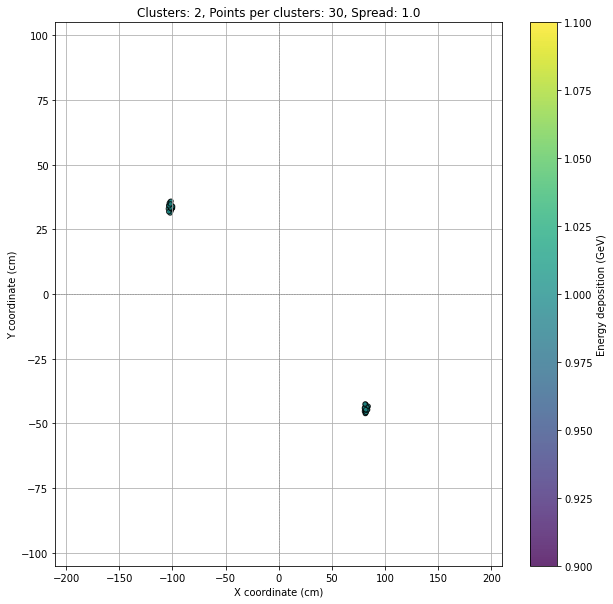

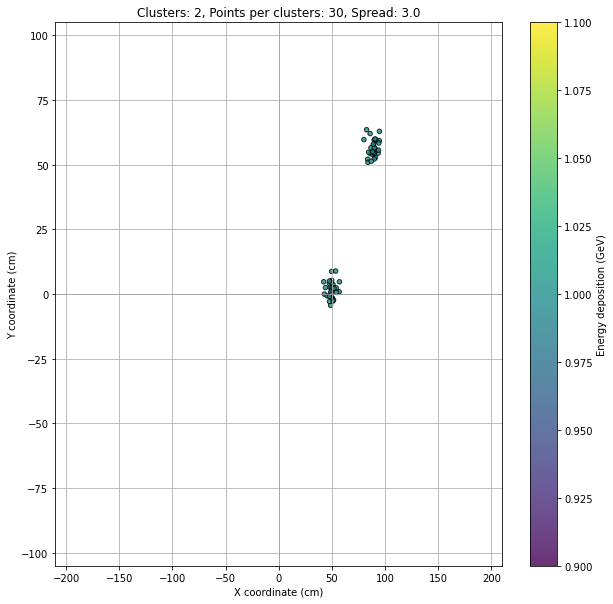

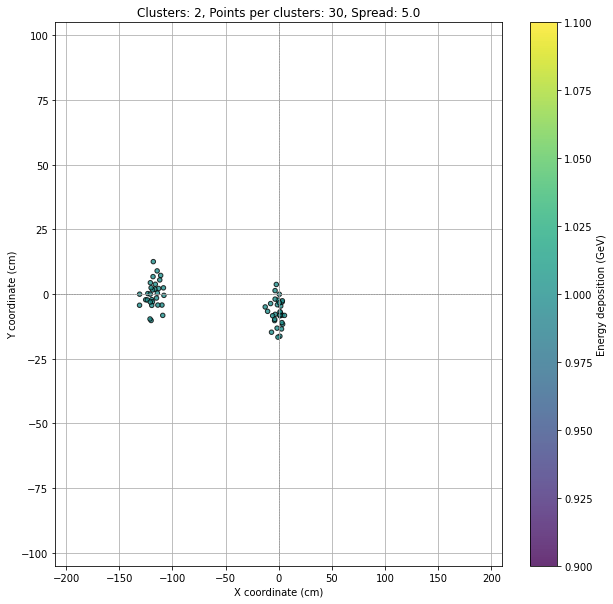

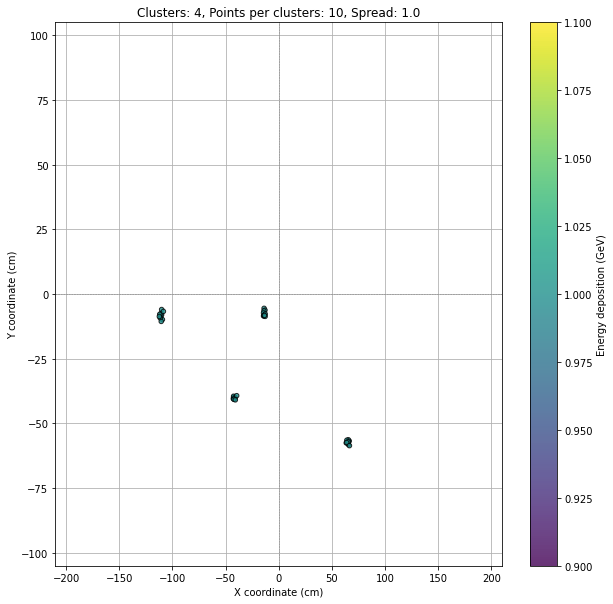

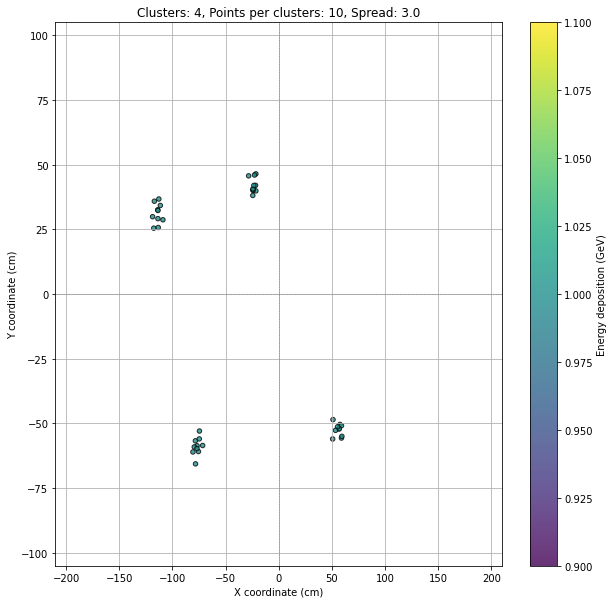

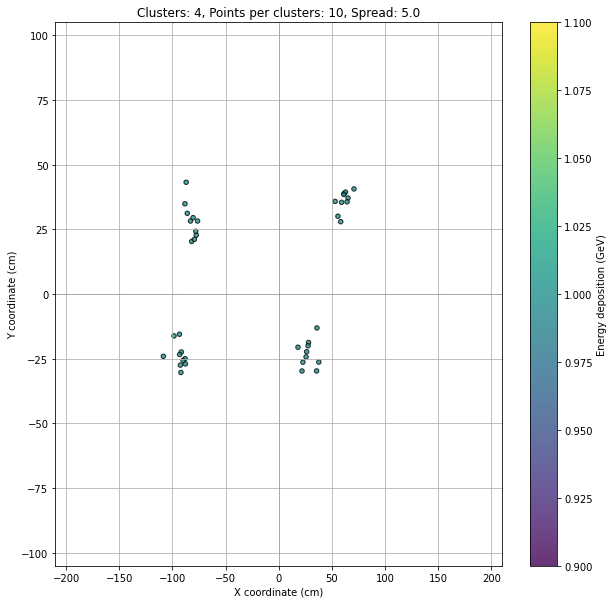

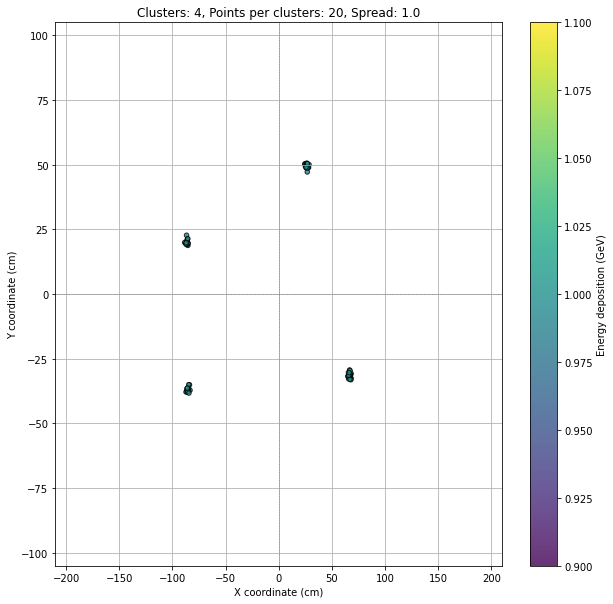

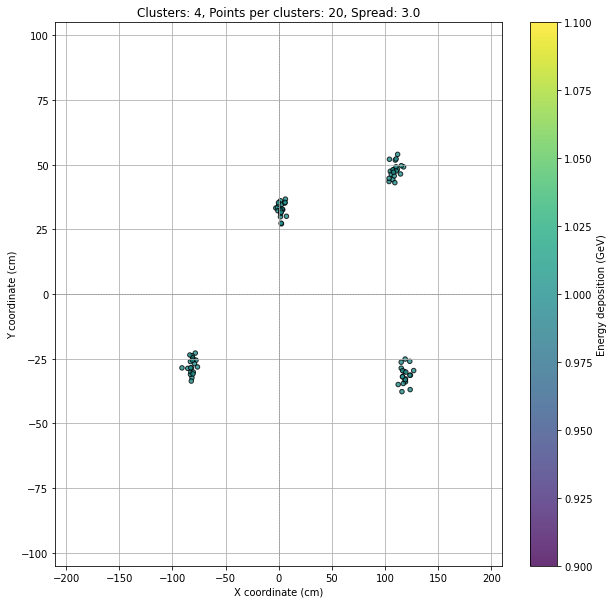

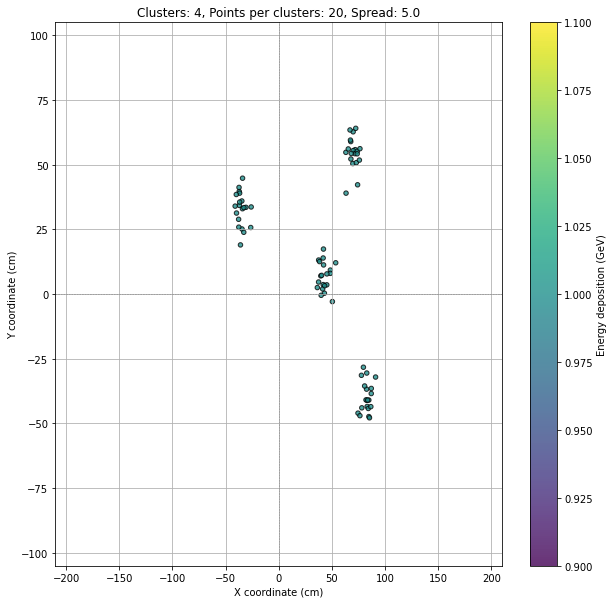

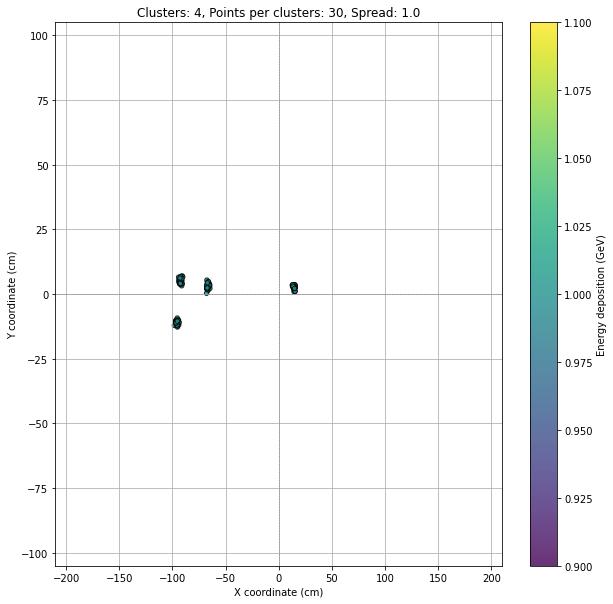

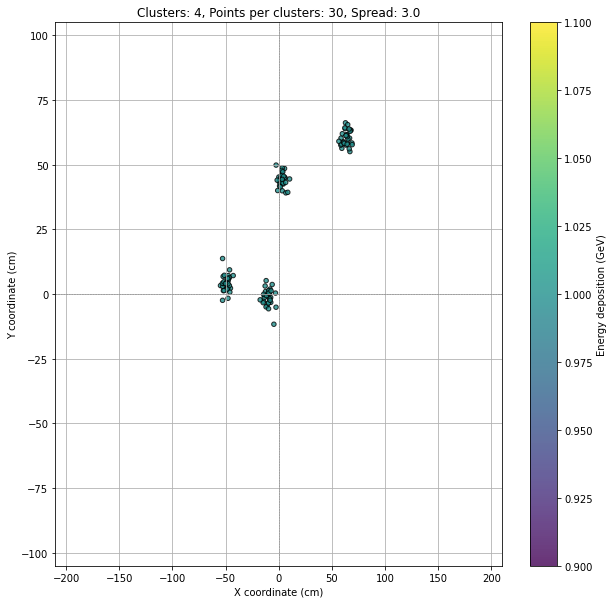

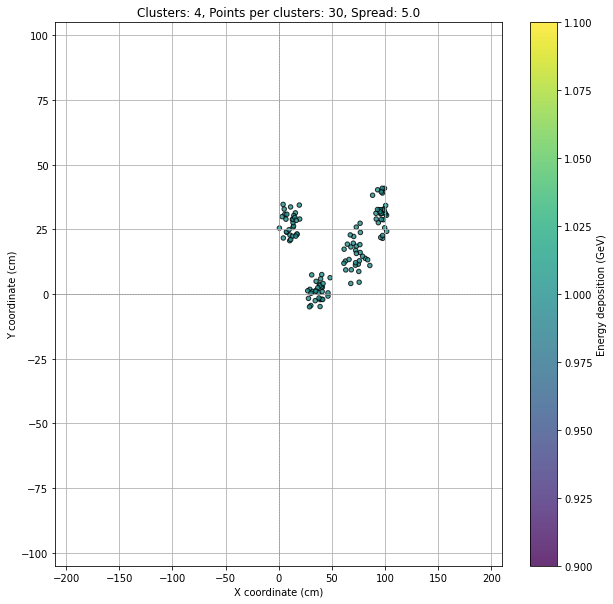

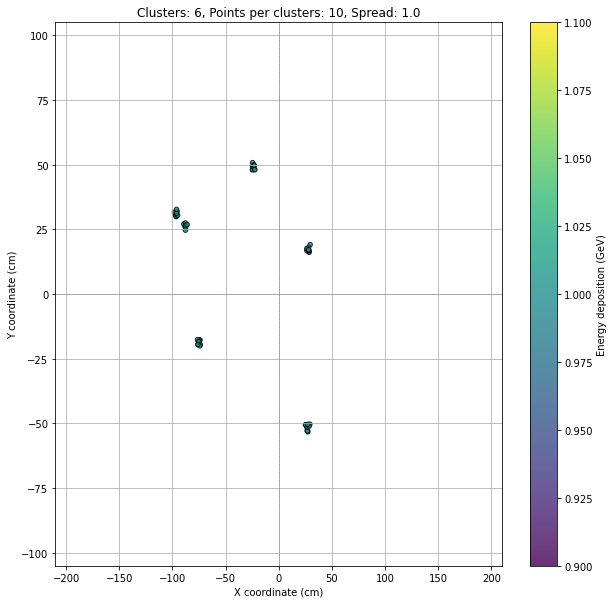

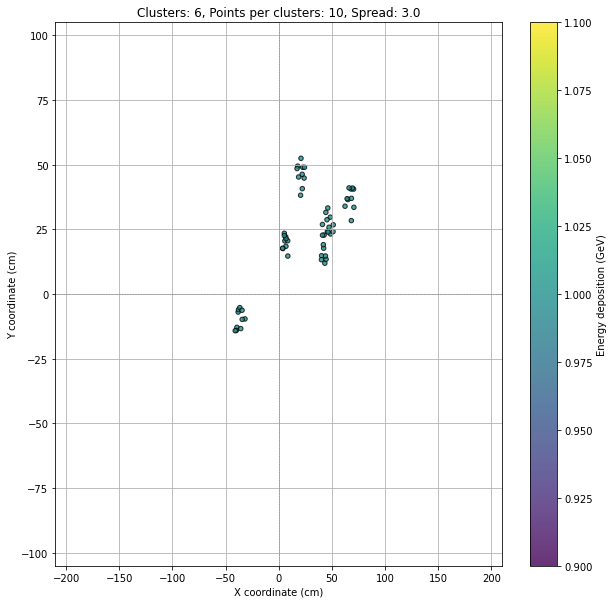

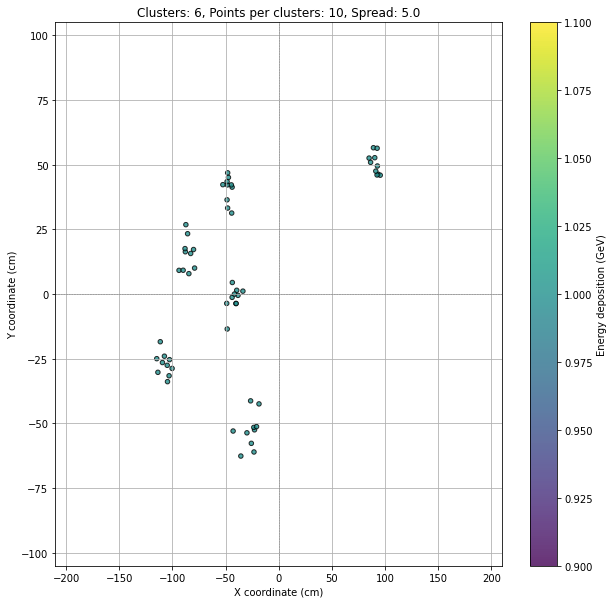

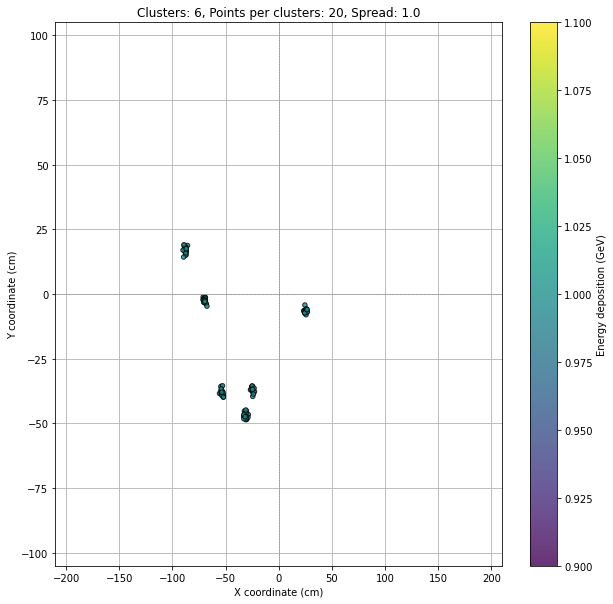

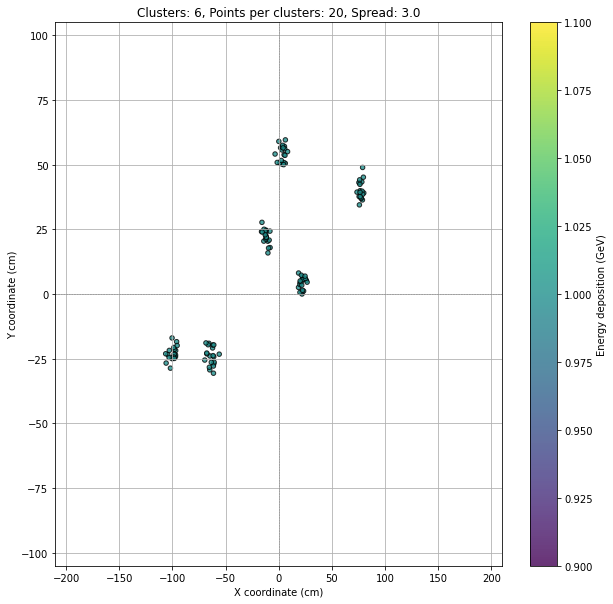

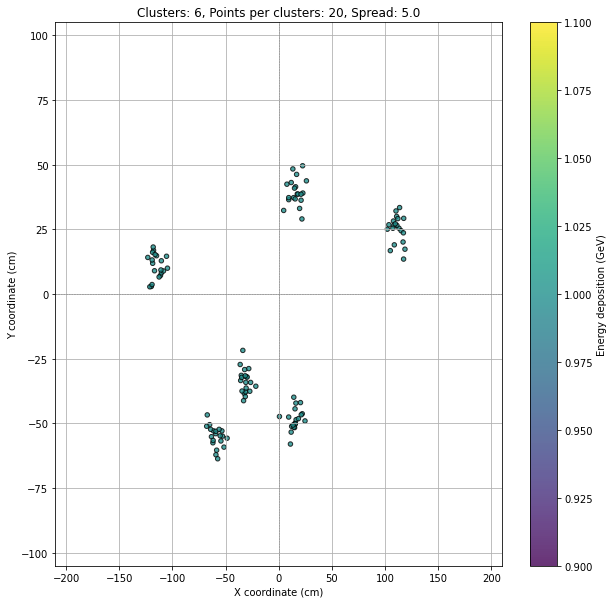

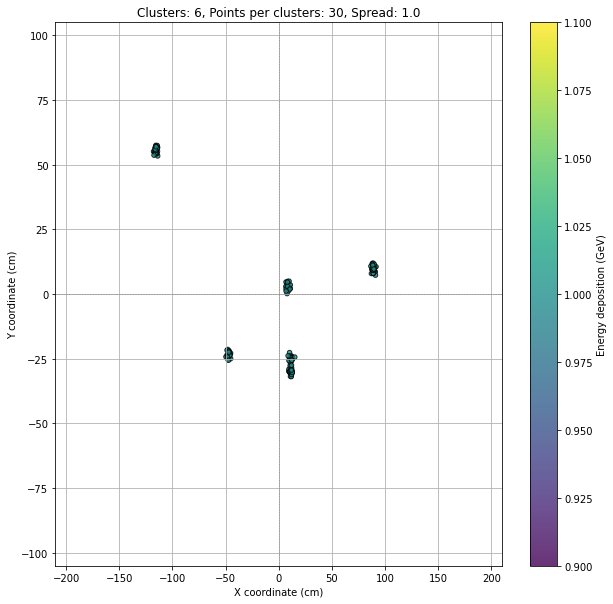

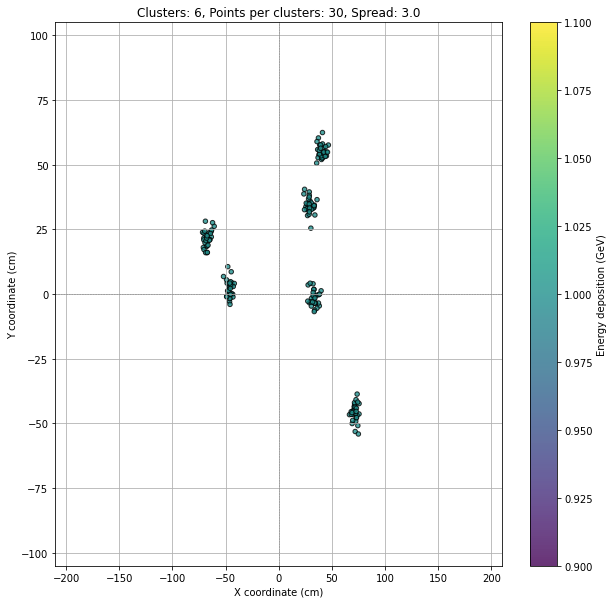

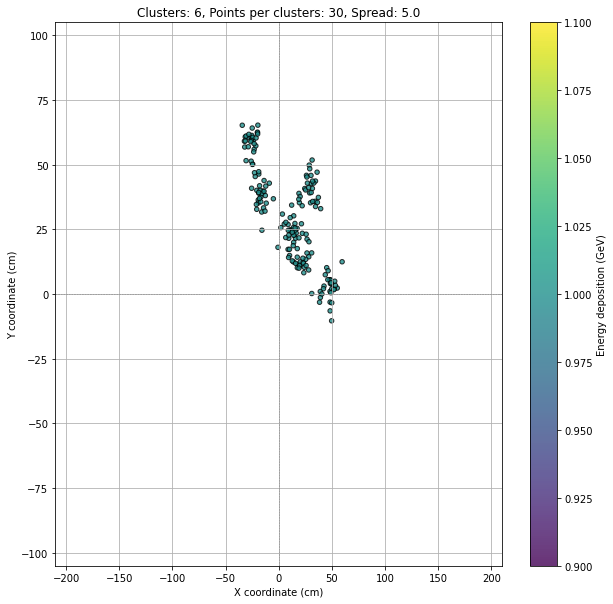

In [15]:
def generate_2d_points(num_clusters, points_per_cluster, spread, random_seed=42):
    np.random.seed(random_seed)
    data = []

    for i in range(num_clusters):
        center = np.random.uniform([-120, -60], [120, 60])
        cluster_points = center + np.random.randn(points_per_cluster, 2) * spread
        data.append(cluster_points)

    data = np.vstack(data)
    return data


def get_constant_array(array, constant=1):
    return np.full(array.shape[0], constant)


i=0
for n in [2, 4, 6]:
    for p in [10, 20, 30]:
        for s in [1., 3., 5.]:
            i+=1
            coordinates = generate_2d_points(num_clusters=n, points_per_cluster=p, spread=s, random_seed=i)
            energies = get_constant_array(array=coordinates, constant=1)
            plot_spatial_energy_matrix(coordinates=coordinates, energies=energies, title=f'Clusters: {n}, Points per clusters: {p}, Spread: {s}')

<div class="alert alert-info">
<strong>Exercise:</strong> 
Implement by yourself, using only standard Python and eventually numpy functions, the K-means clustering algorithm and test it on few generated datasets. Visualize the identified clusters, their centroids and the associated hits.</span>
</div>

Converged after 3 iterations


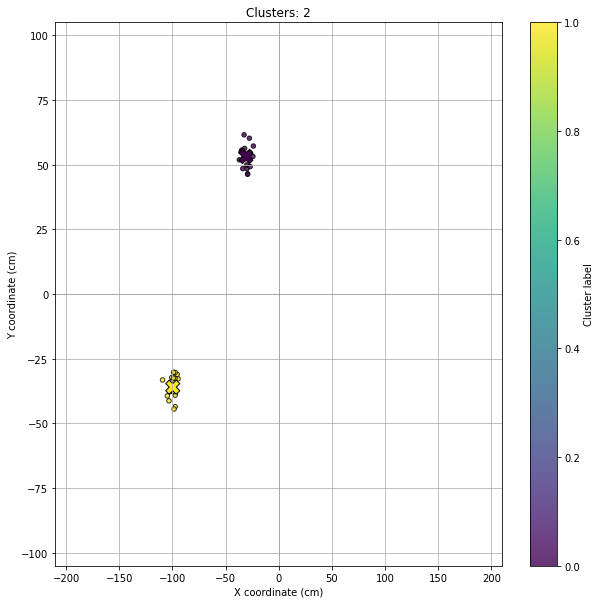

Converged after 4 iterations


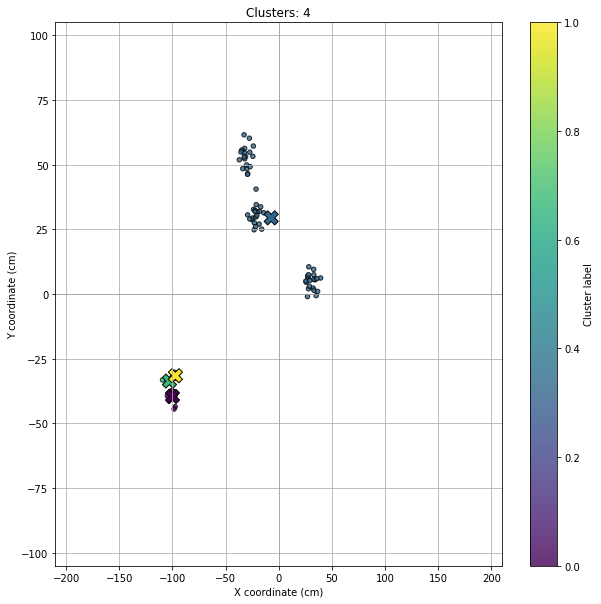

Converged after 2 iterations


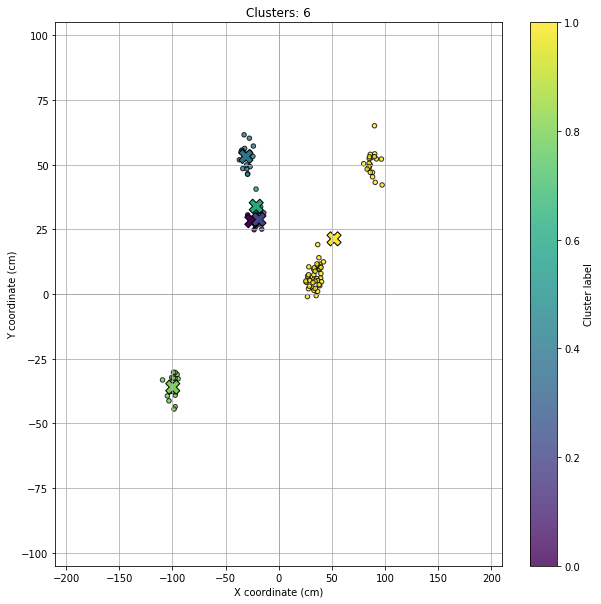

In [16]:
def plot_spatial_energy_matrix_complex(coordinates, energies, centroids=None, labels=None, title="EMCal clusters", marker_size_scale=20, color_map="viridis"):

    import matplotlib  # noqa
    
    x, y = coordinates[:, 0], coordinates[:, 1]
    plt.figure(figsize=(10, 10))

    if labels is None:
        # If no labels are provided, color by energy
        scatter = plt.scatter(
            x, y,
            c=energies,
            s=energies * marker_size_scale,
            cmap=color_map,
            edgecolor="k",
            alpha=0.8
        )
        plt.colorbar(scatter, label="Energy deposition (GeV)")
    else:
        # If labels are provided, color by cluster label
        unique_labels = np.unique(labels)
        centroid_colors = matplotlib.colormaps[color_map](np.linspace(0, 1, len(unique_labels)))
        point_colors = np.array([centroid_colors[label] for label in labels])
        label_to_centroid_color = {label: centroid_colors[i] for i, label in enumerate(unique_labels)}
        scatter = plt.scatter(
            x, y,
            c=point_colors,
            s=energies * marker_size_scale,
            edgecolor="k",
            alpha=0.8
        )
        plt.colorbar(scatter, label="Cluster label")
    # If centroids are provided, plot the centroids
    if centroids is not None:
        cx, cy = centroids[:, 0], centroids[:, 1]
        if labels is not None:
            centroid_colors = [
                label_to_centroid_color[label] for label in range(len(centroids))
            ]
        else:
            centroid_colors = [
                matplotlib.colormaps.get_cmap(color_map)(i / len(centroids)) for i in range(len(centroids))
            ]
        centroid_scatter = plt.scatter(
            cx, cy,
            color=centroid_colors,
            marker='X',
            s=200,
            edgecolor="k",
            label="Centroids"
        )

    plt.title(title)
    plt.xlabel("X coordinate (cm)")
    plt.ylabel("Y coordinate (cm)")
    plt.xlim(-210, 210)
    plt.ylim(-105, 105)
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.show()


def k_means(data, k, max_iterations=100, tolerance=1e-4, random_seed=42, initial_centroids=None):
    # Step 1: Initialize centroids
    n_samples, n_features = data.shape

    if initial_centroids is not None:
        assert(len(initial_centroids) == k)
        centroids = data[initial_centroids]
    else:
        # Otherwise, initialize centroids randomly
        np.random.seed(random_seed)
        centroids = data[np.random.choice(n_samples, size=k, replace=False)]

    # Step 4.2: Iterate
    for i in range(max_iterations):

        # Step 3.1: Compute the Euclidean distance
        distances = np.zeros((n_samples, k))
        for i_point in range(n_samples):
            for j_centroid in range(k):
                diff = data[i_point] - centroids[j_centroid]
                squared_distance = np.sum(diff ** 2)
                distances[i_point, j_centroid] = np.sqrt(squared_distance)

        # Step 3.2: Assign hits to the closest centroid
        labels = np.zeros(n_samples, dtype=int)
        for i_point in range(n_samples):
            closest_centroid_index = np.argmin(distances[i_point])
            labels[i_point] = closest_centroid_index

        # Step 3.3: Calculate new centroids
        new_centroids = np.zeros_like(centroids)
        for j_centroid in range(k):
            points_in_cluster = data[labels == j_centroid]
            if points_in_cluster.shape[0] > 0:  # Avoid division by zero (if no points in a cluster)
                new_centroids[j_centroid] = np.mean(points_in_cluster, axis=0)

        # Step 3.4: Check if the algorithm converged
        if np.all(np.abs(new_centroids - centroids) < tolerance):
            print(f"Converged after {i+1} iterations")
            break

        # Step 4.1: Update centroids for the next iteration
        centroids = new_centroids

    return centroids, labels


for n in [2, 4, 6]:
    coordinates = generate_2d_points(num_clusters=n, points_per_cluster=20, spread=4.)
    centroids, labels = k_means(coordinates, n)
    energies = get_constant_array(coordinates)
    plot_spatial_energy_matrix_complex(coordinates, energies, centroids=centroids, labels=labels, title=f'Clusters: {n}')

<a name='section_3_2'></a>
<hr style="height: 1px;">


## <h3 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #FFA500">Problem 3.2: Finding optimal number of centroids</h3>

<div class="alert alert-info">
<strong>Exercise:</strong> 
Implement by yourself an elbow method for your K-means algorithm and test it on few events to evaluate its performance.</span>
</div>

###############################################################################################
Generating 2 clusters...
Converged after 3 iterations


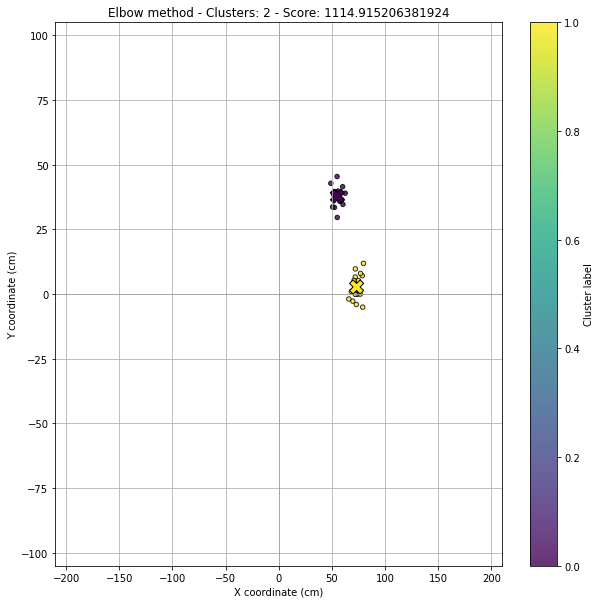

Converged after 5 iterations


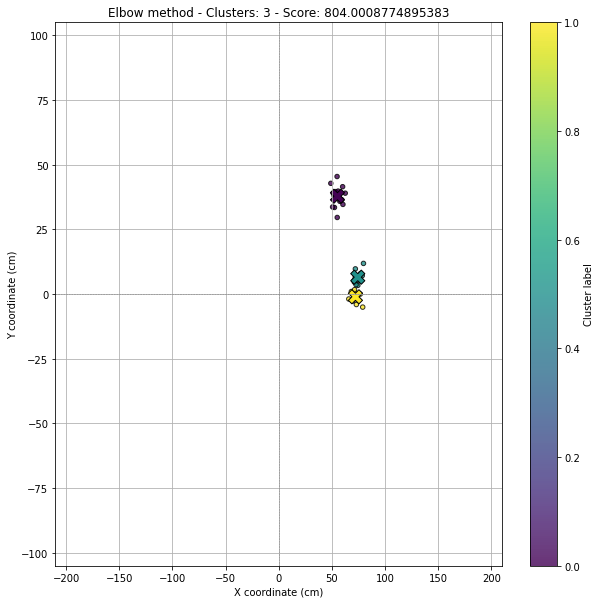

Converged after 7 iterations


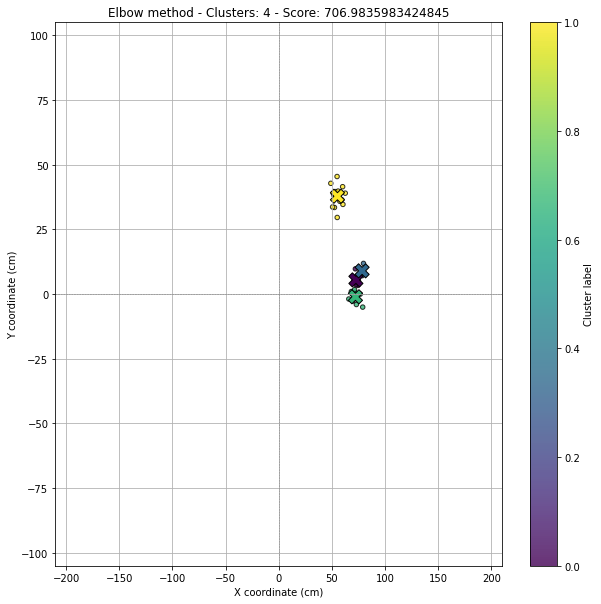

Converged after 6 iterations


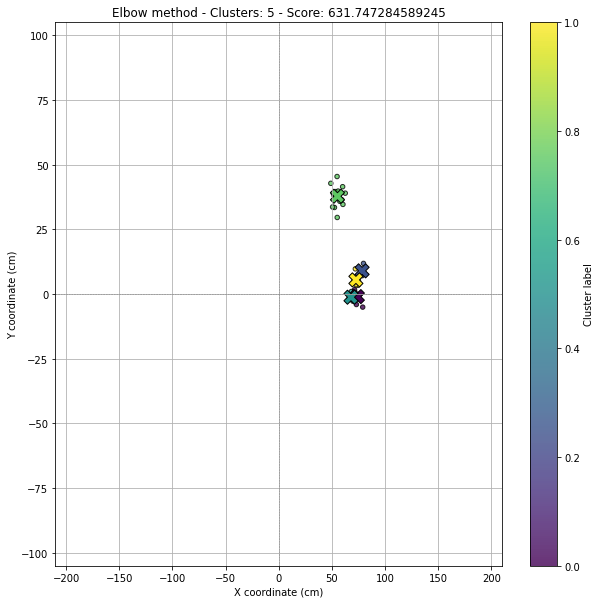

Converged after 5 iterations


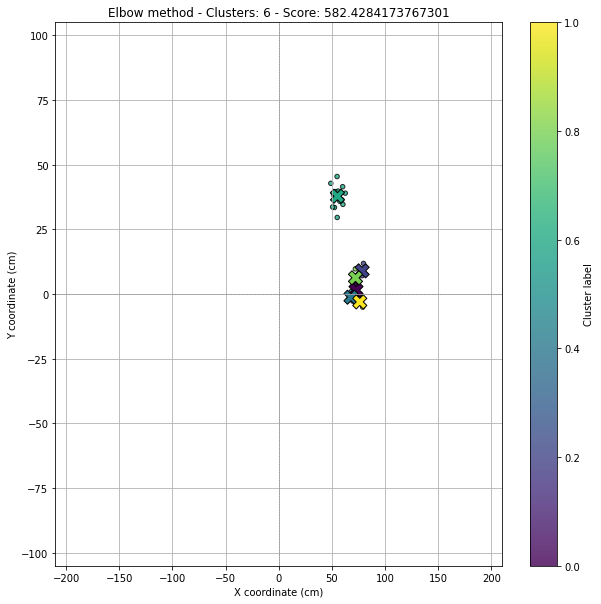

Converged after 10 iterations


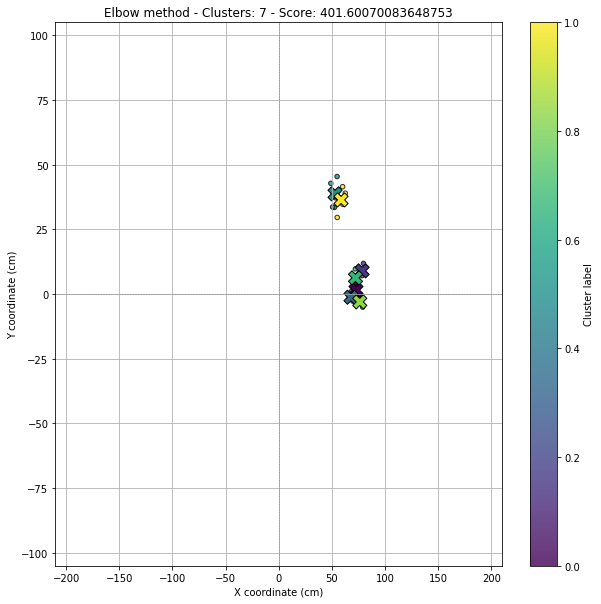

Converged after 5 iterations


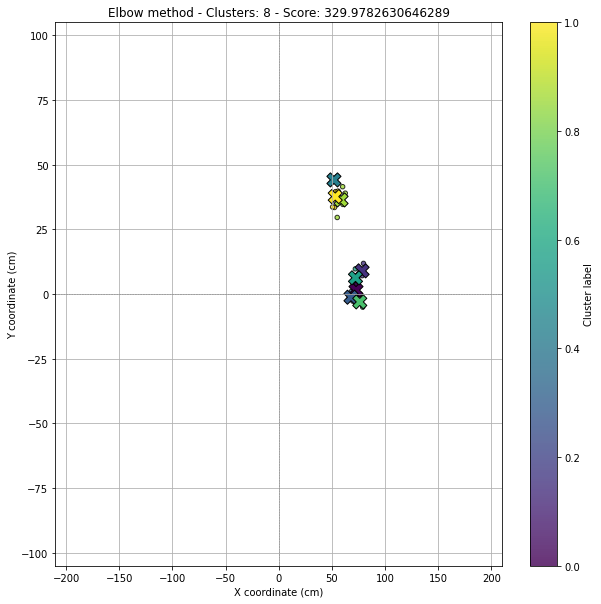

Converged after 5 iterations


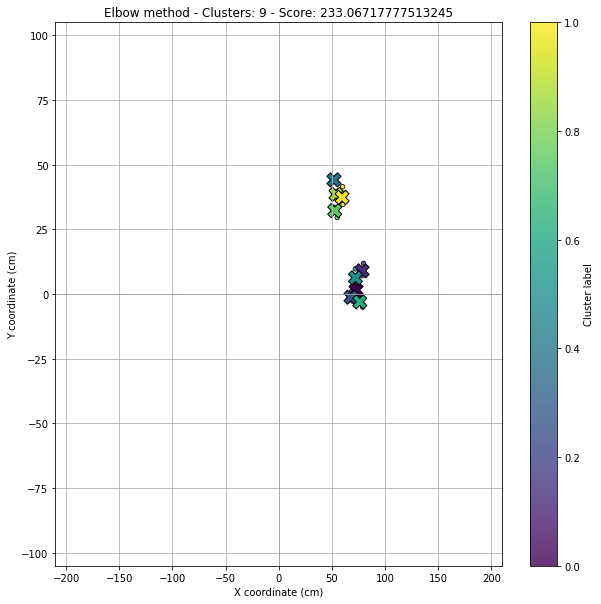

Converged after 5 iterations


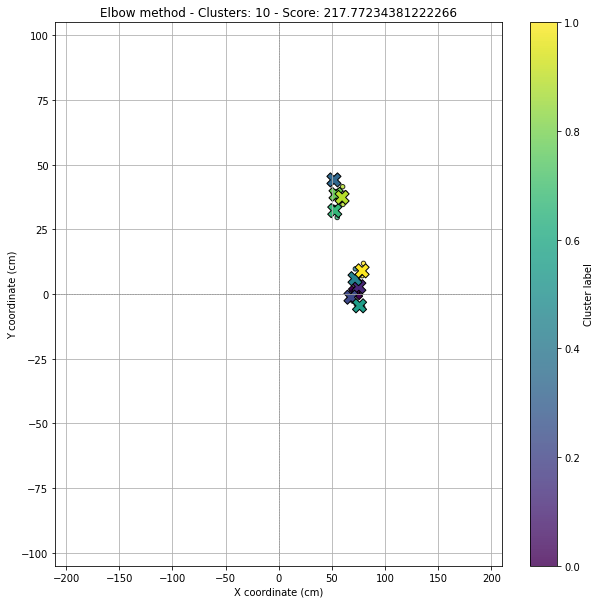

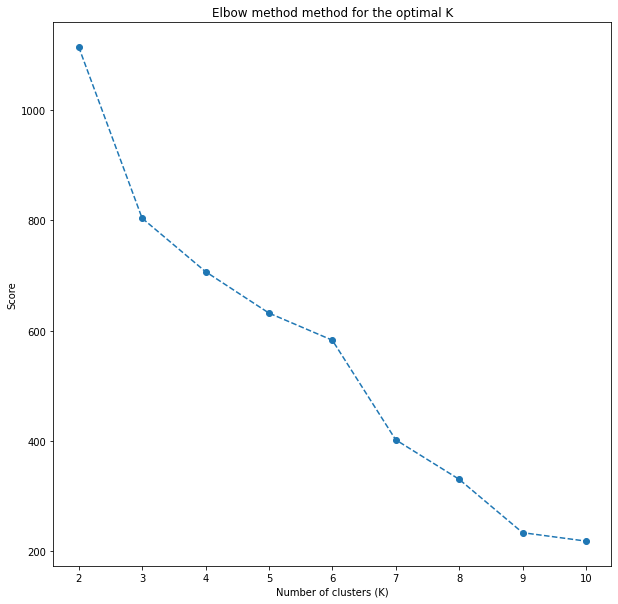

###############################################################################################
Generating 4 clusters...
Converged after 2 iterations


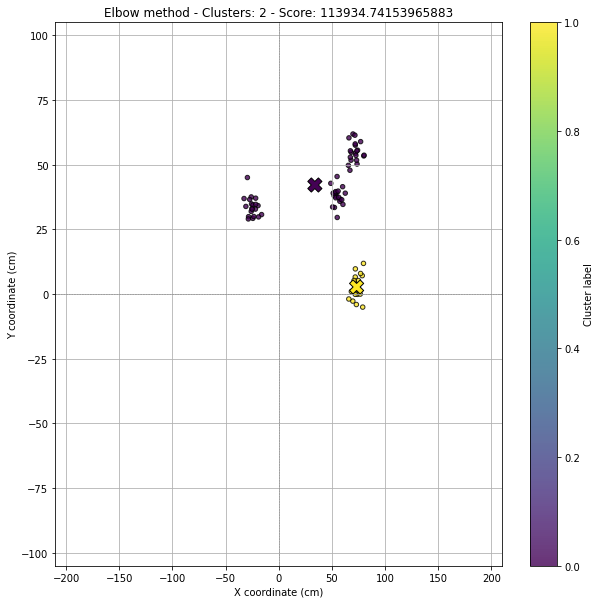

Converged after 3 iterations


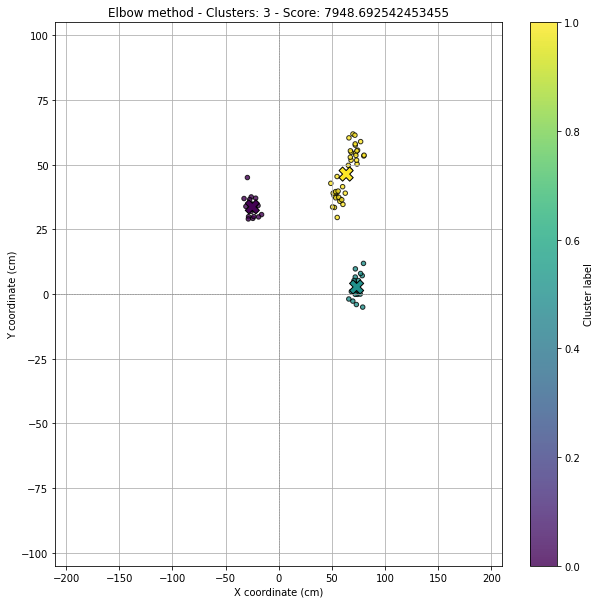

Converged after 4 iterations


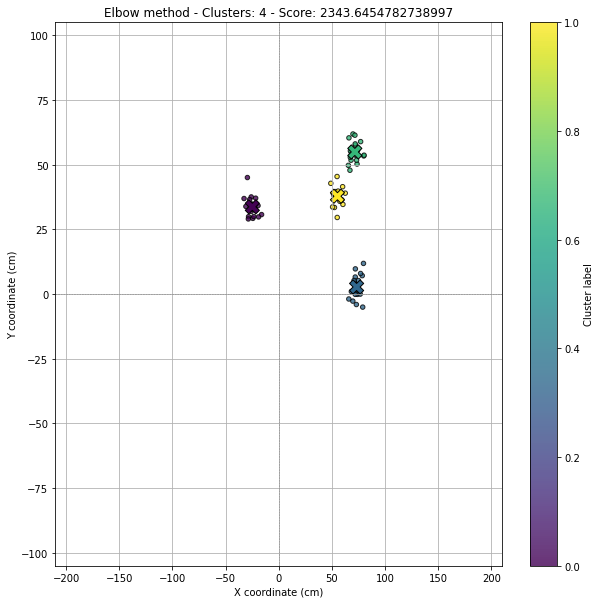

Converged after 4 iterations


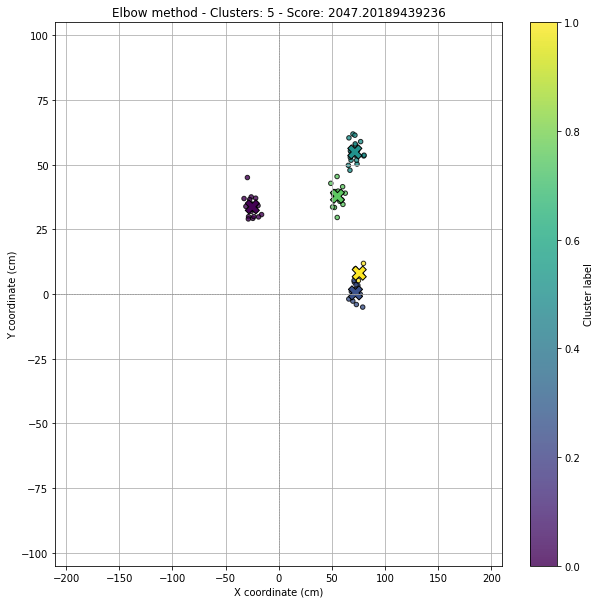

Converged after 7 iterations


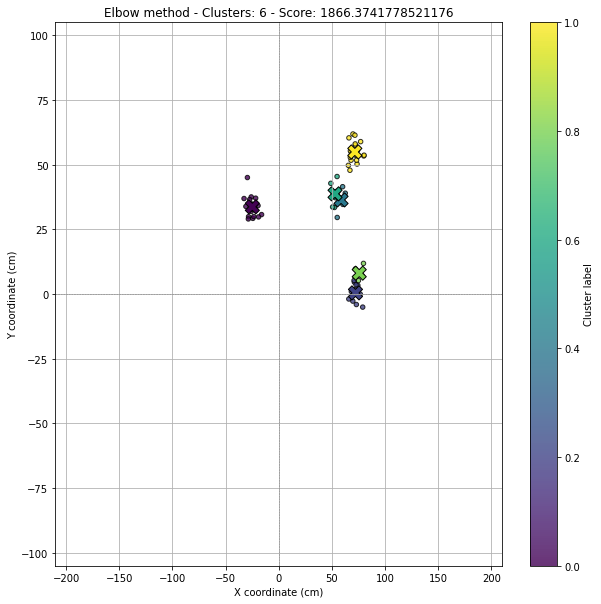

Converged after 7 iterations


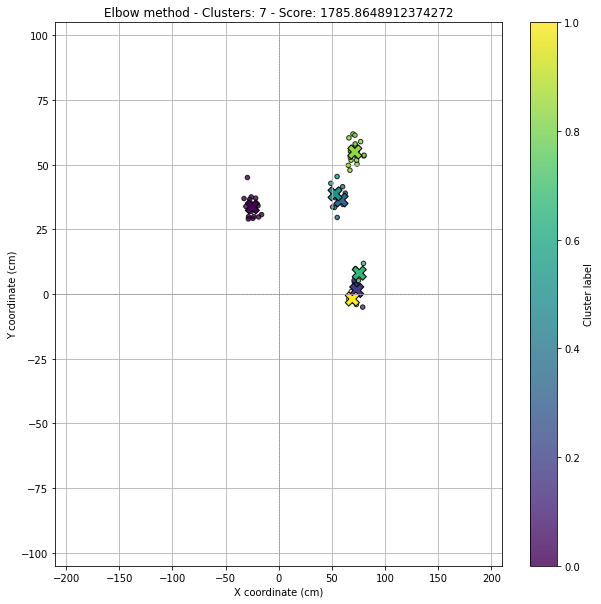

Converged after 6 iterations


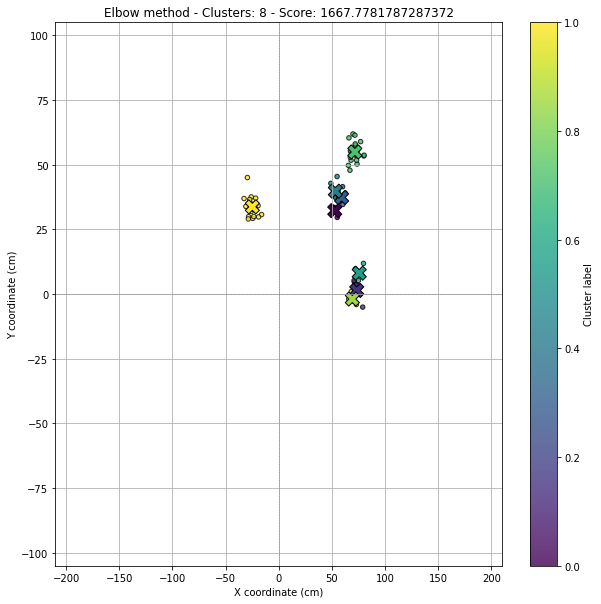

Converged after 6 iterations


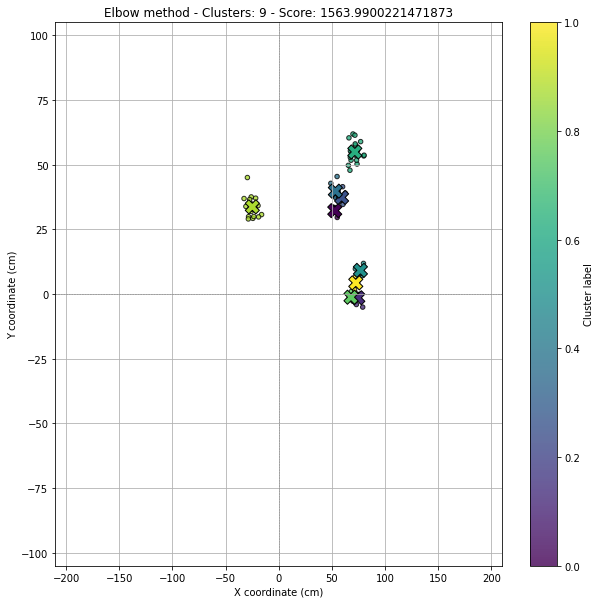

Converged after 6 iterations


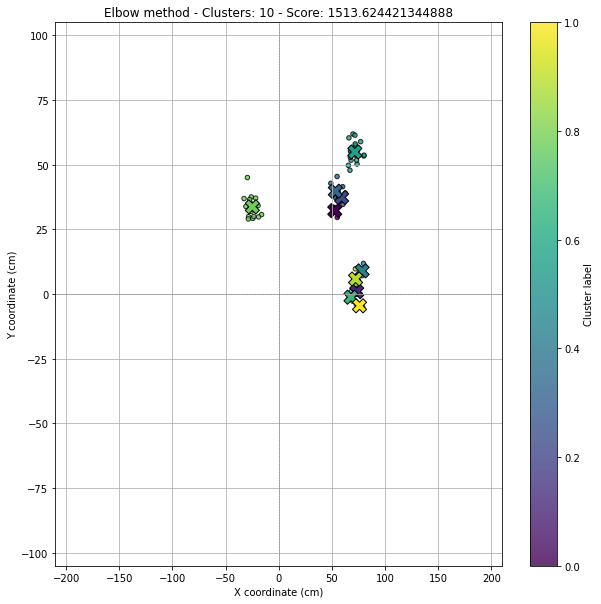

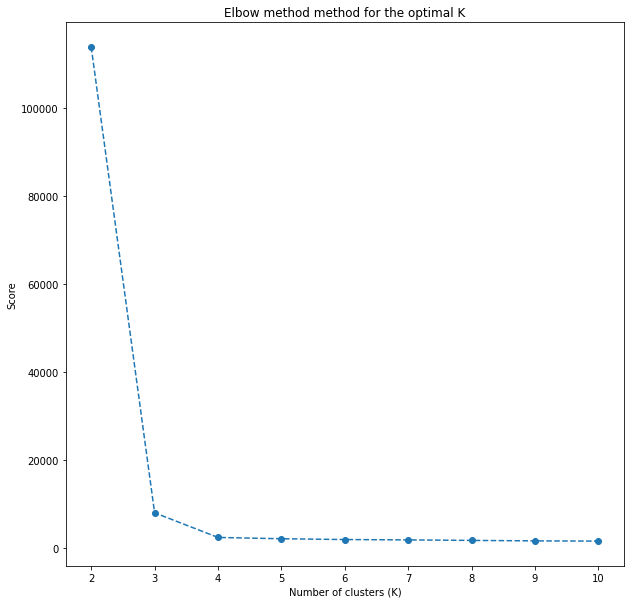

###############################################################################################
Generating 6 clusters...
Converged after 3 iterations


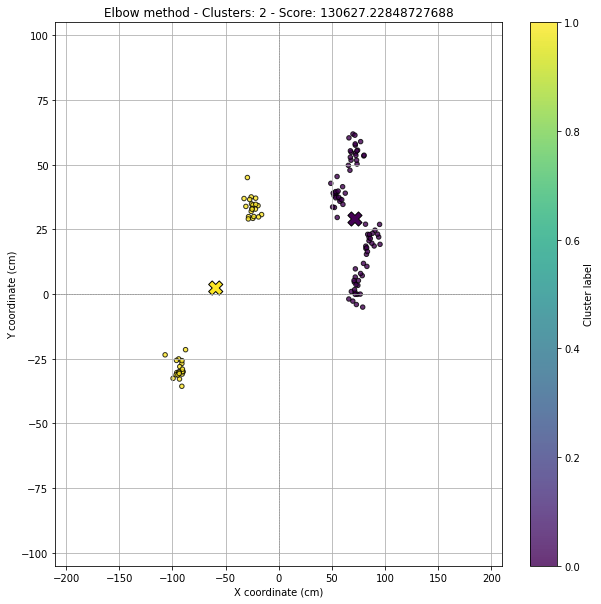

Converged after 4 iterations


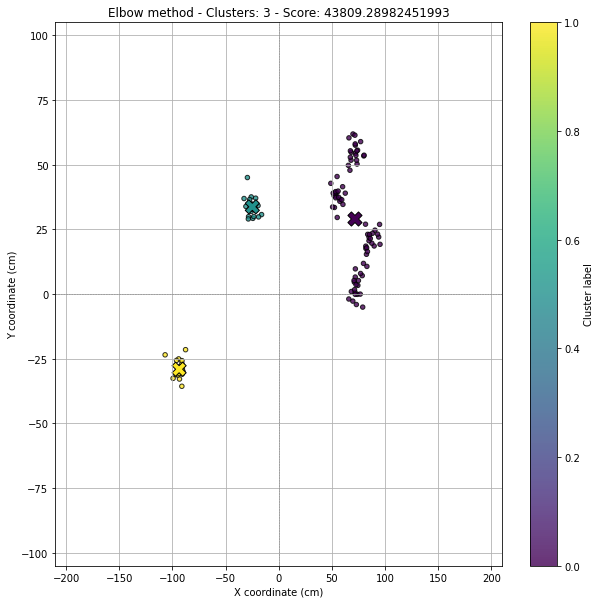

Converged after 4 iterations


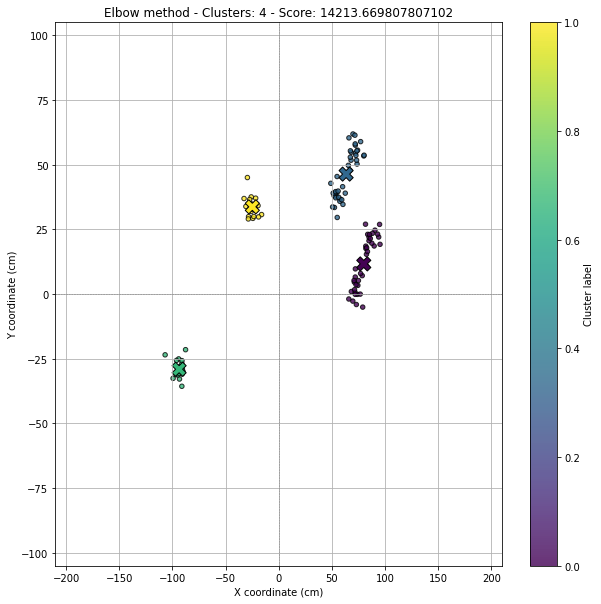

Converged after 5 iterations


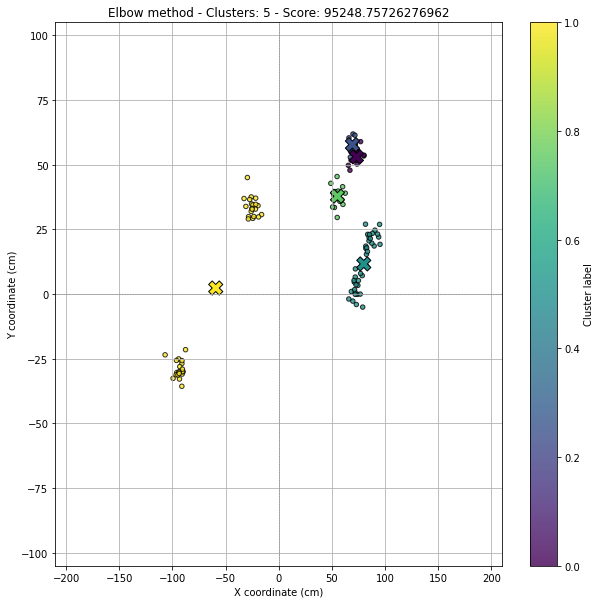

Converged after 5 iterations


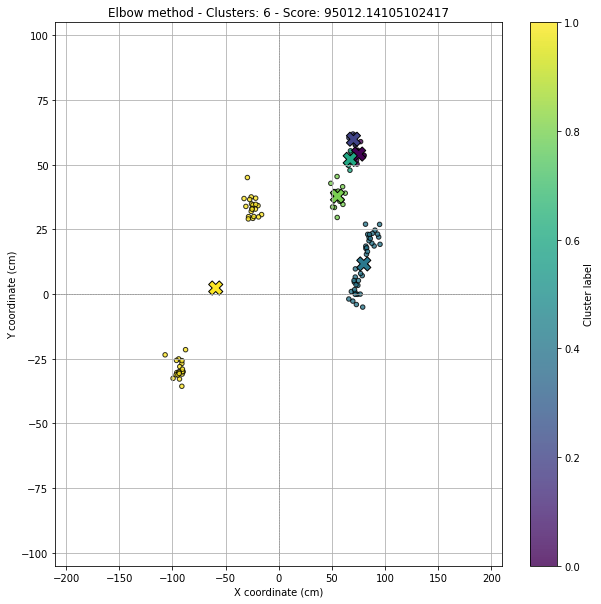

Converged after 5 iterations


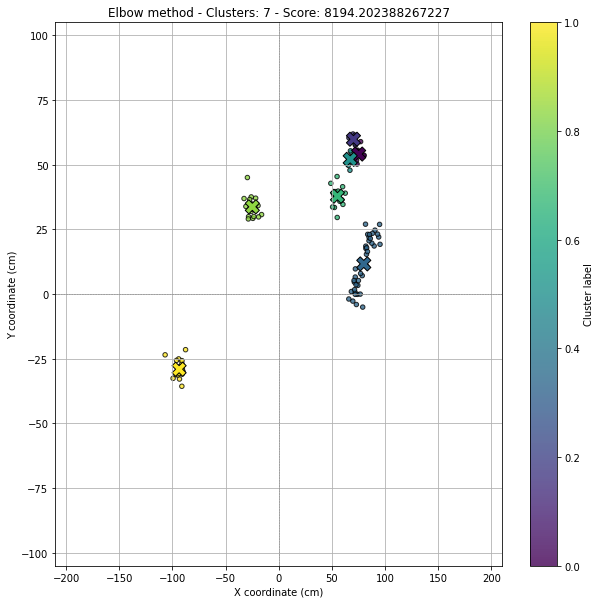

Converged after 5 iterations


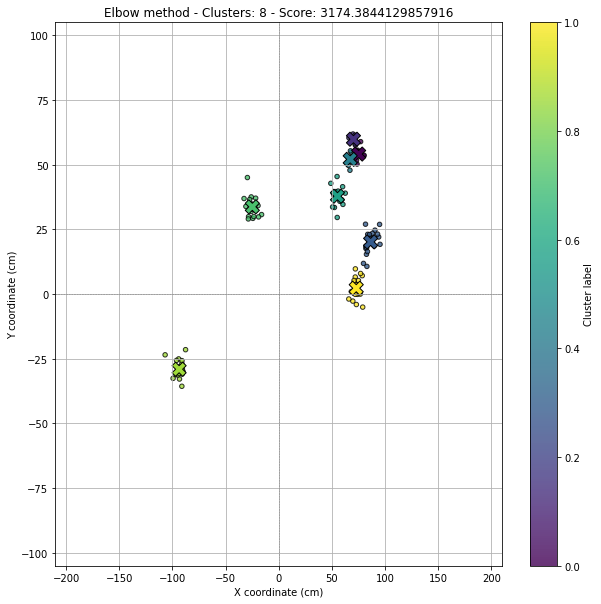

Converged after 5 iterations


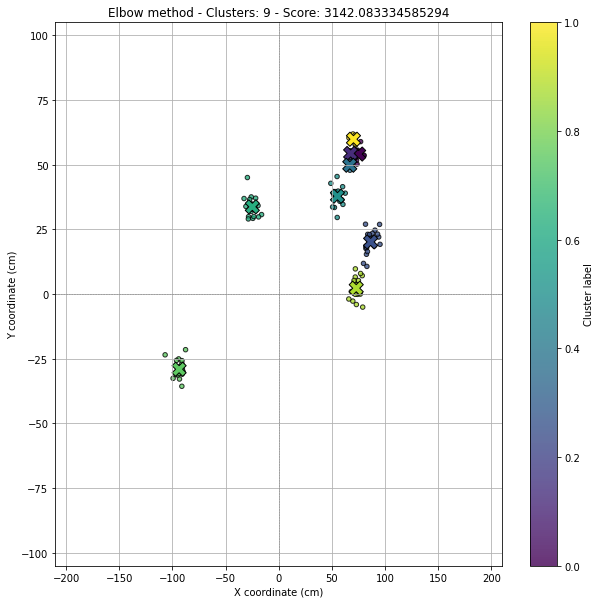

Converged after 5 iterations


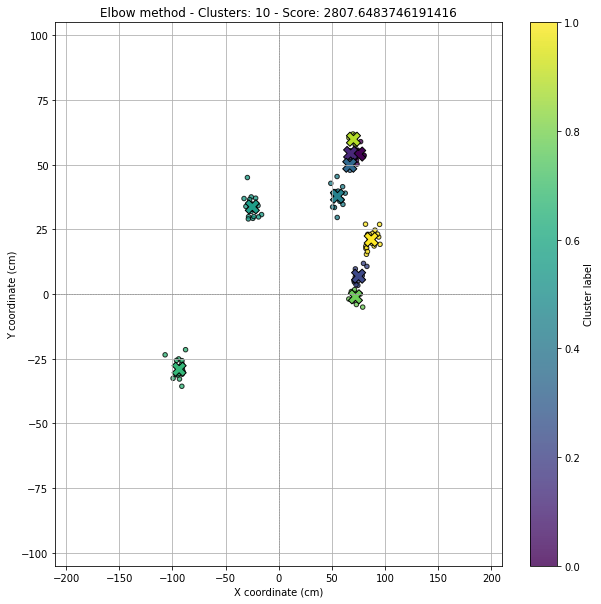

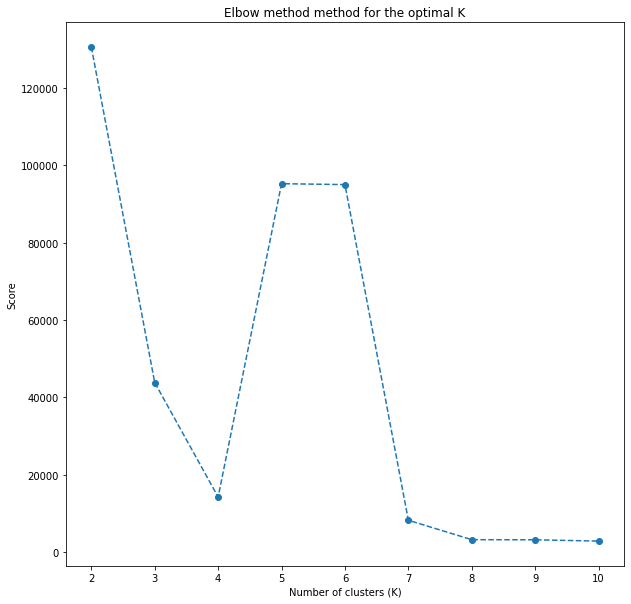

In [17]:
def evaluate_method(data, score_method, title_label, min_k=1, max_k=10):
    score_values = []

    for k in range(min_k, max_k + 1):
        centroids, labels = k_means(data, k)
        score = score_method(data, centroids, labels)
        energies = get_constant_array(data)
        plot_spatial_energy_matrix_complex(data, energies, centroids=centroids, labels=labels, title=f'{title_label} - Clusters: {k} - Score: {score}')
        score_values.append(score)

    plt.figure(figsize=(10, 10))
    plt.plot(range(min_k, max_k + 1), score_values, marker='o', linestyle='--')
    plt.title(f"{title_label} method for the optimal K")
    plt.xlabel("Number of clusters (K)")
    plt.ylabel("Score")
    plt.show()


def wcss_score(data, centroids, labels):
    wcss = 0
    k = len(centroids)
    for i in range(k):
        cluster_points = data[labels == i]
        centroid = centroids[i]
        squared_distances = np.sum((cluster_points - centroid) ** 2, axis=1)
        wcss += np.sum(squared_distances)
    return wcss


for n in [2, 4, 6]:
    print('###############################################################################################')
    print(f'Generating {n} clusters...')
    coordinates = generate_2d_points(num_clusters=n, points_per_cluster=20, spread=4., random_seed=999)
    evaluate_method(data=coordinates, score_method=wcss_score, title_label='Elbow method', min_k=2, max_k=10)

<div class="alert alert-info">
<strong>Exercise:</strong> 
Implement by yourself a silhouette method for your K-means algorithm and test it on few events to evaluate its performance.</span>

###############################################################################################
Generating 2 clusters...
Converged after 3 iterations


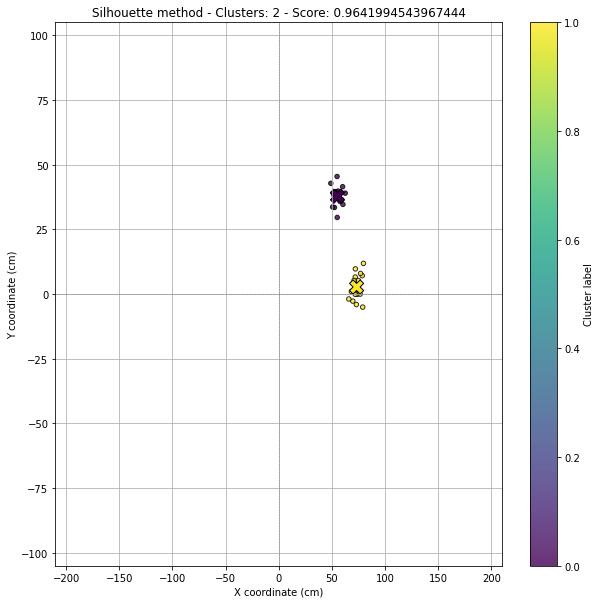

Converged after 5 iterations


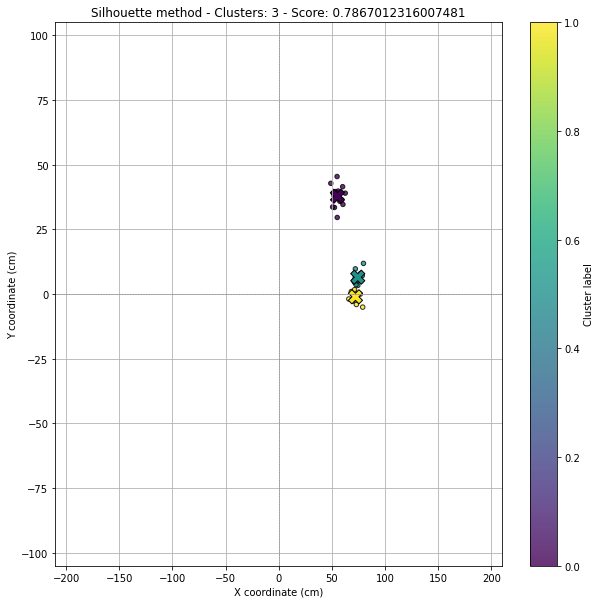

Converged after 7 iterations


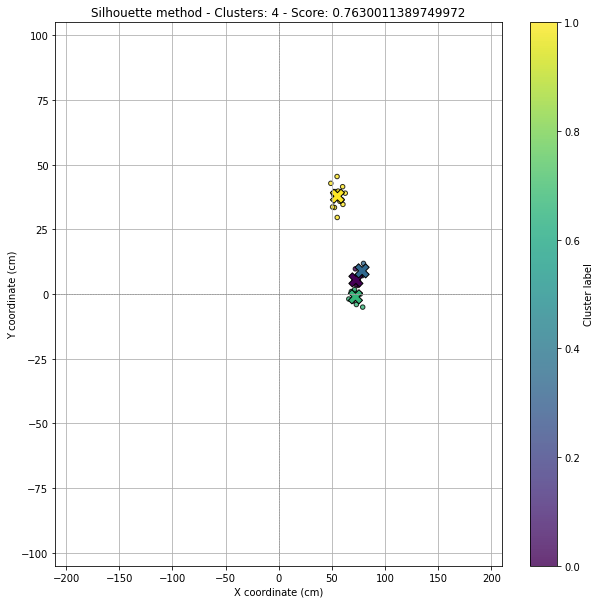

Converged after 6 iterations


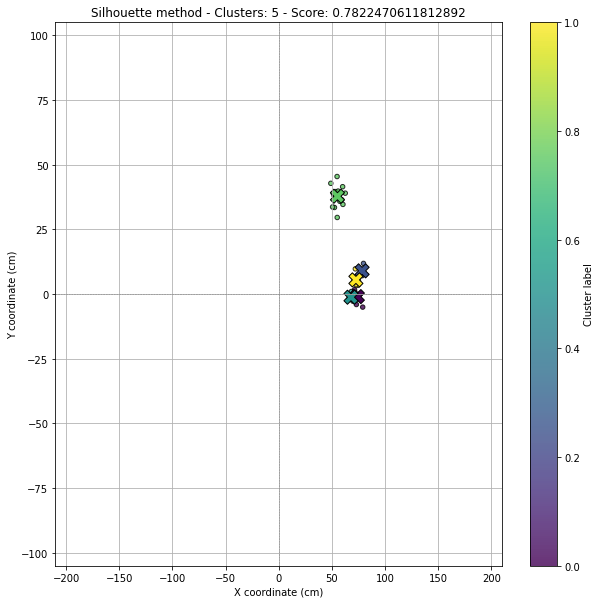

Converged after 5 iterations


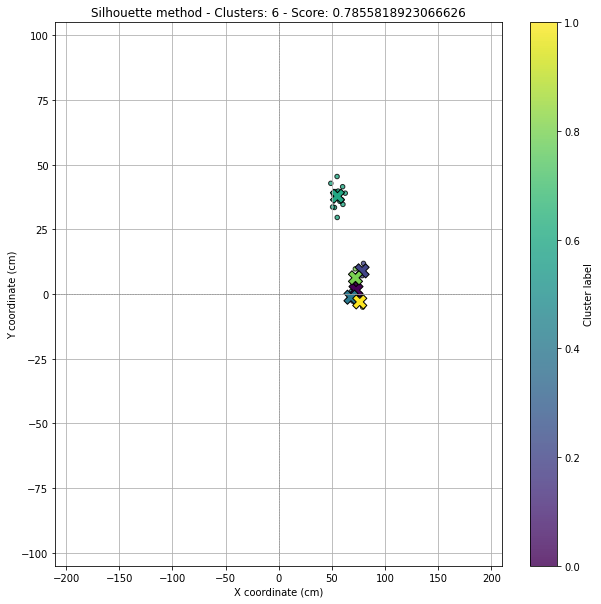

Converged after 10 iterations


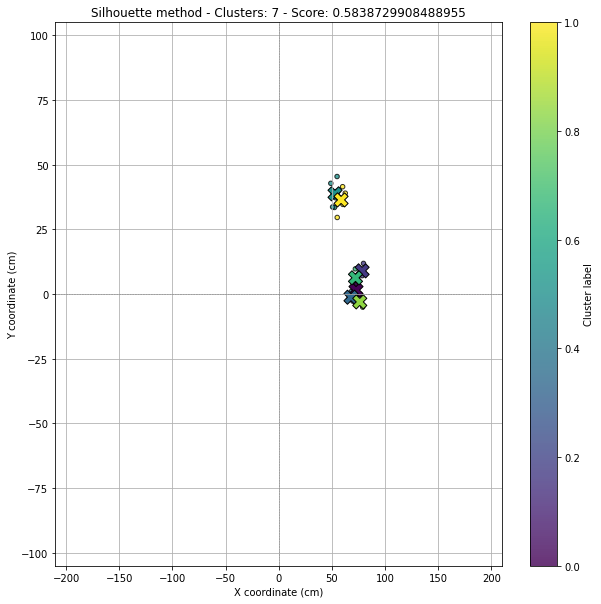

Converged after 5 iterations


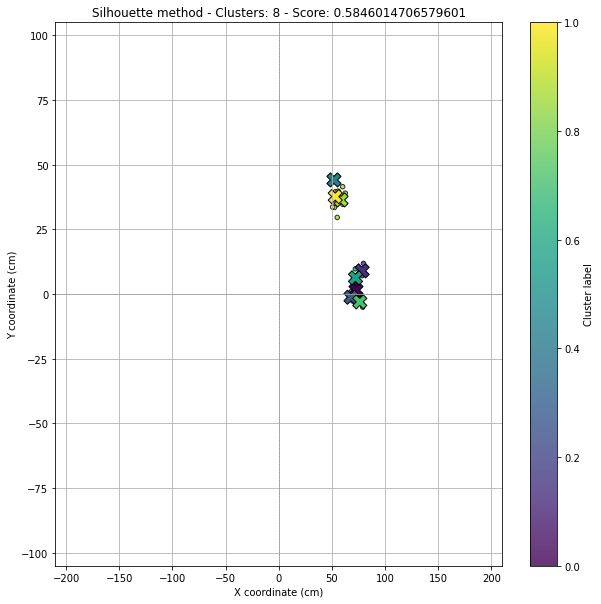

Converged after 5 iterations


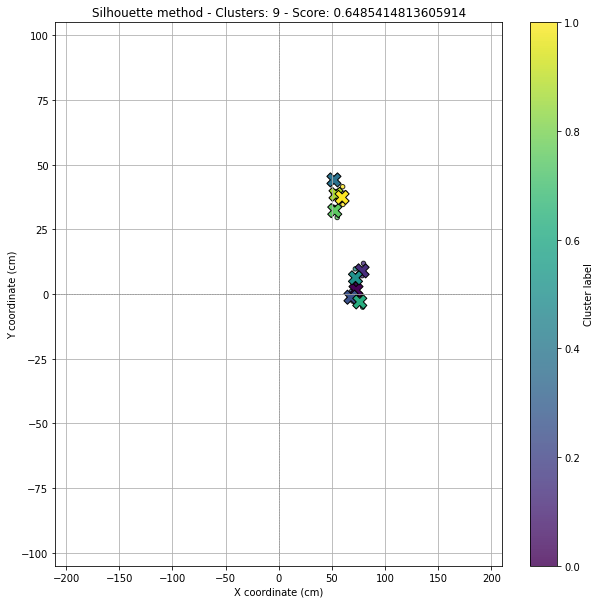

Converged after 5 iterations


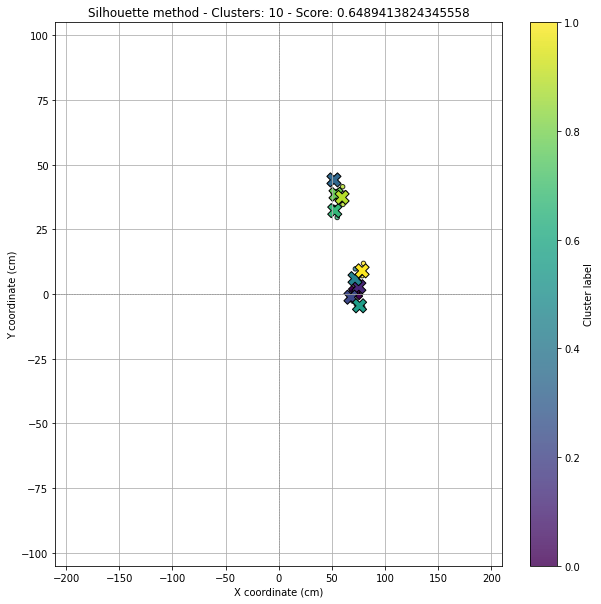

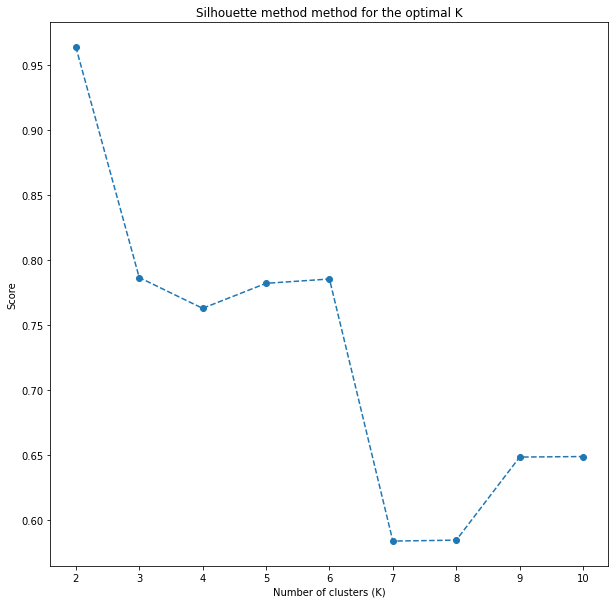

###############################################################################################
Generating 4 clusters...
Converged after 2 iterations


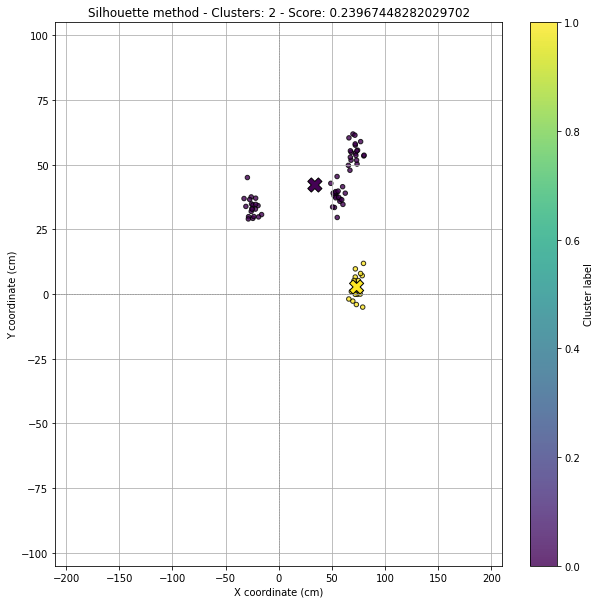

Converged after 3 iterations


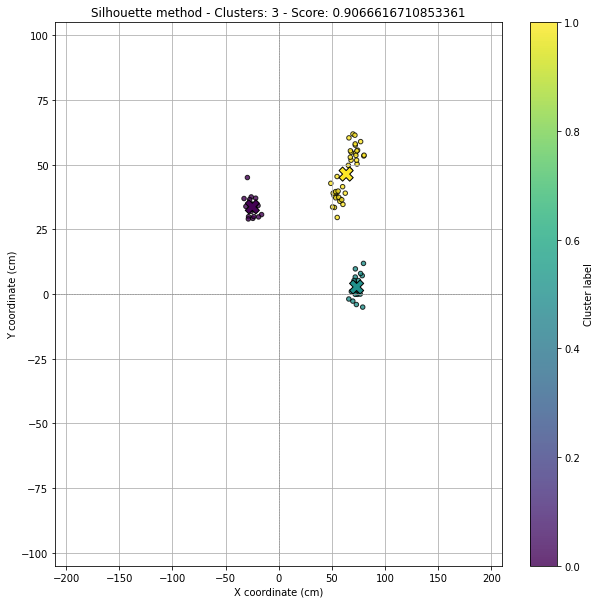

Converged after 4 iterations


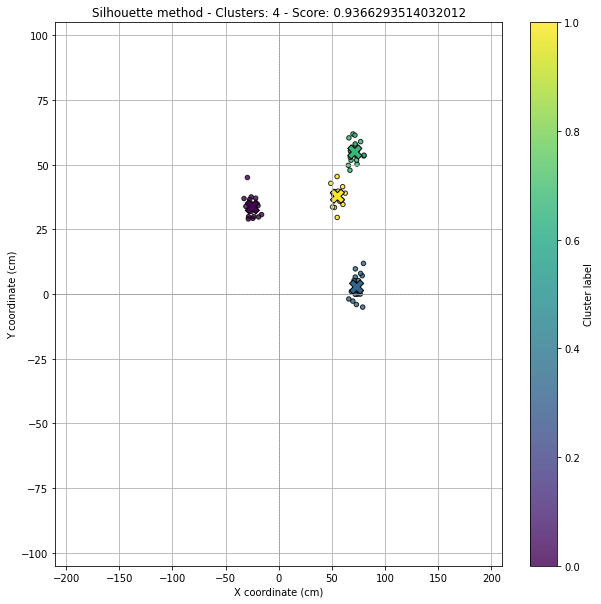

Converged after 4 iterations


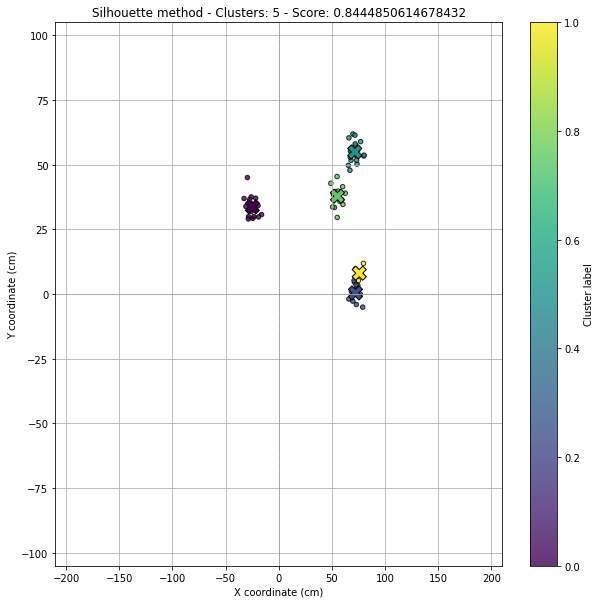

Converged after 7 iterations


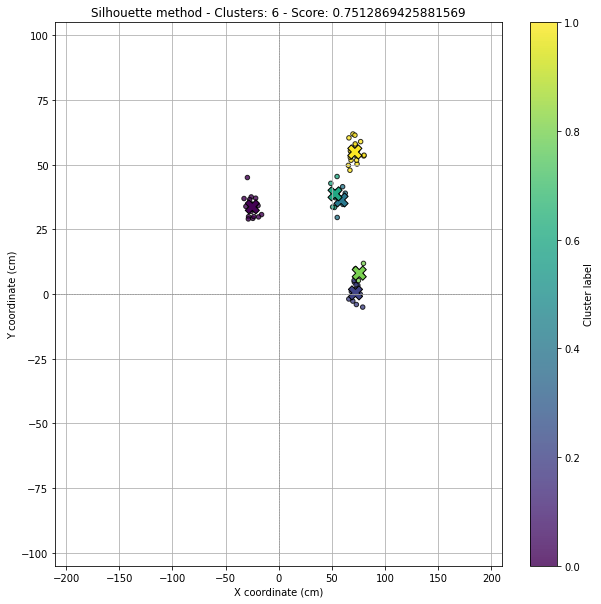

Converged after 7 iterations


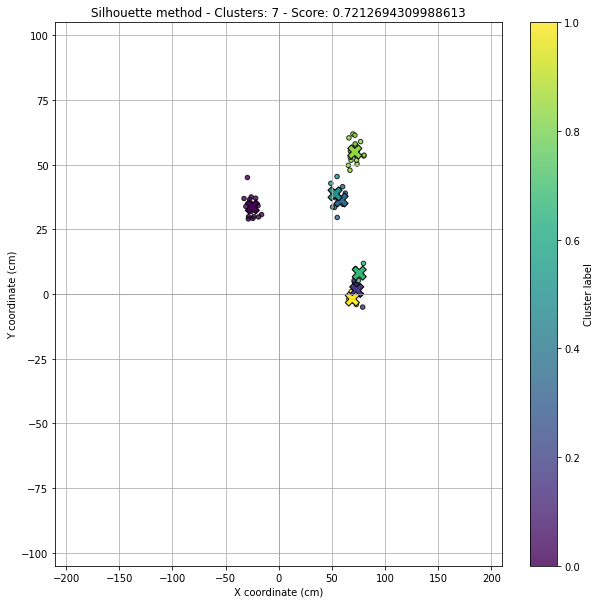

Converged after 6 iterations


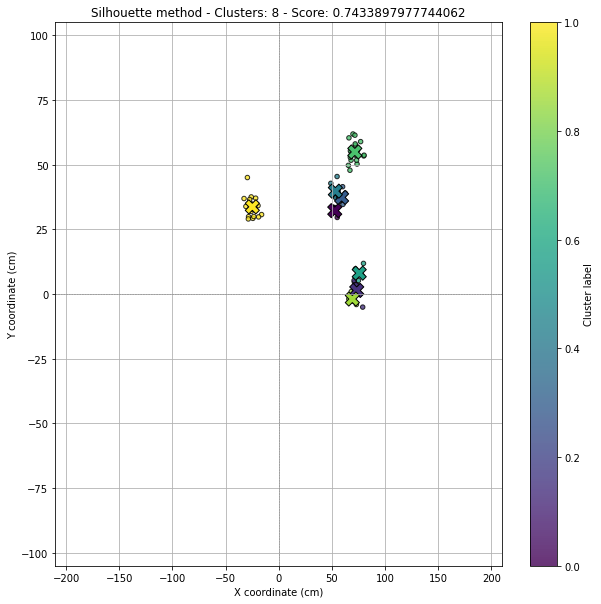

Converged after 6 iterations


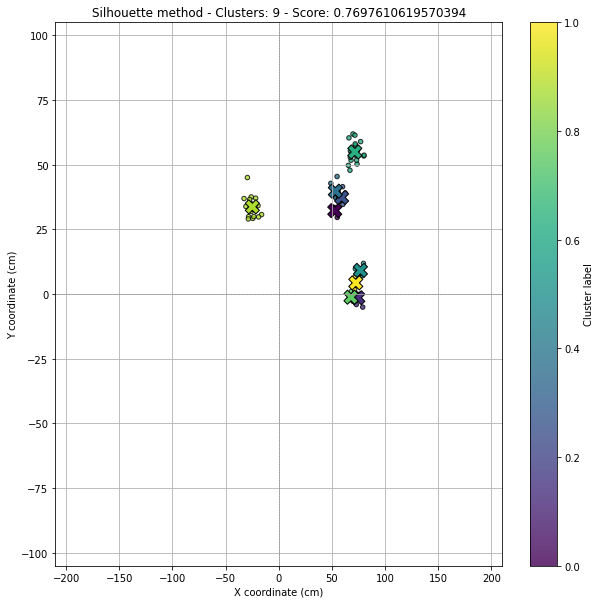

Converged after 6 iterations


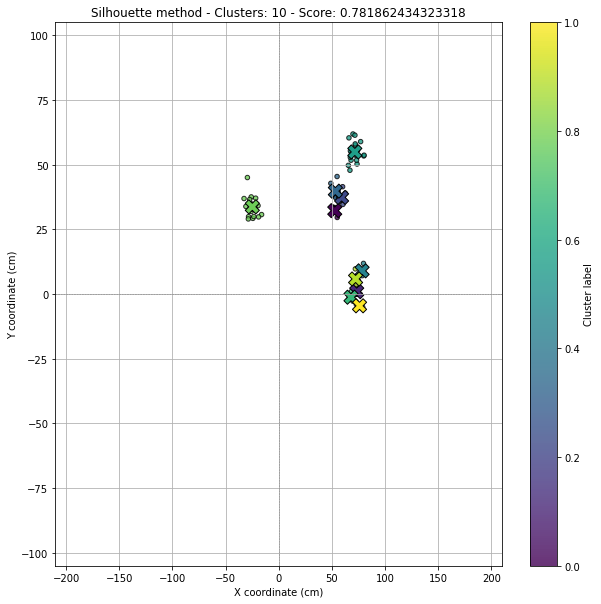

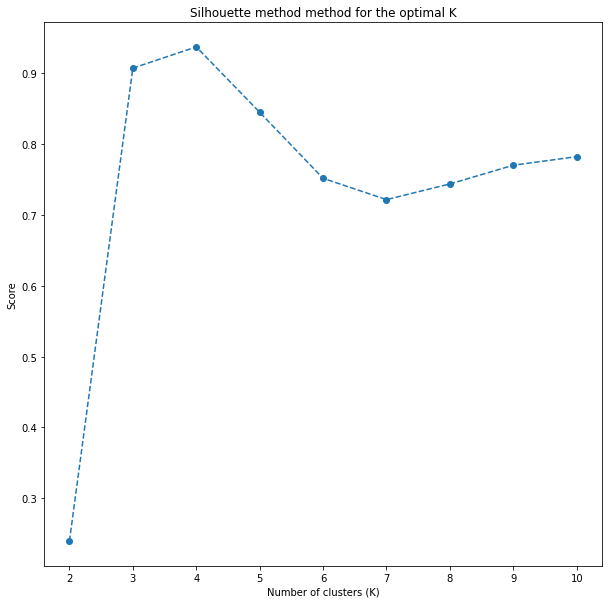

###############################################################################################
Generating 6 clusters...
Converged after 3 iterations


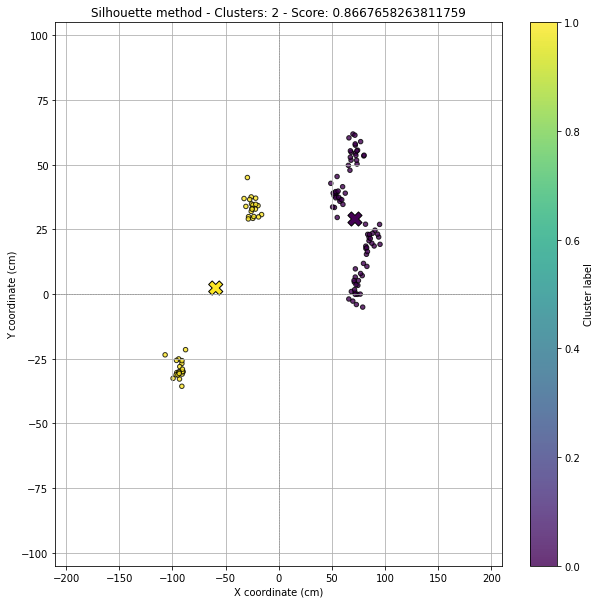

Converged after 4 iterations


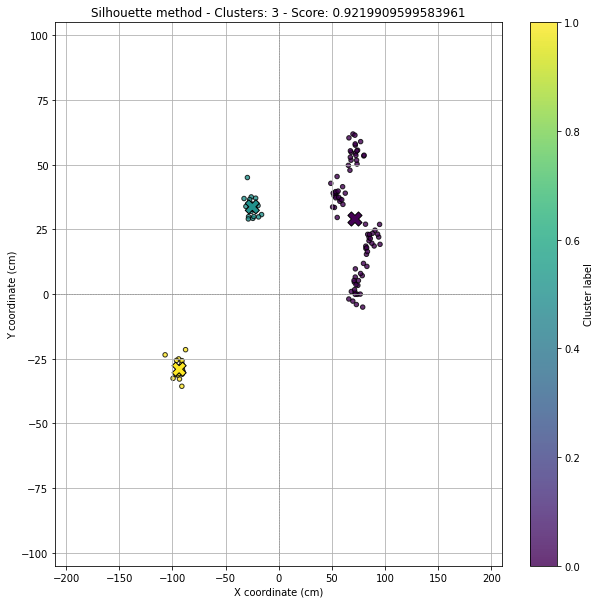

Converged after 4 iterations


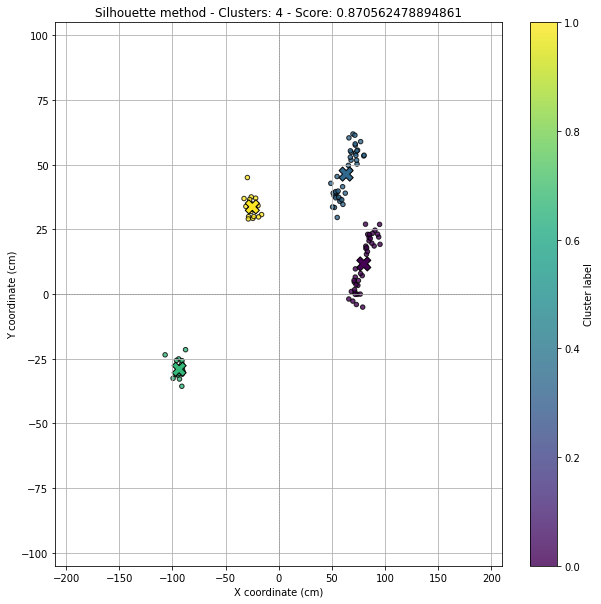

Converged after 5 iterations


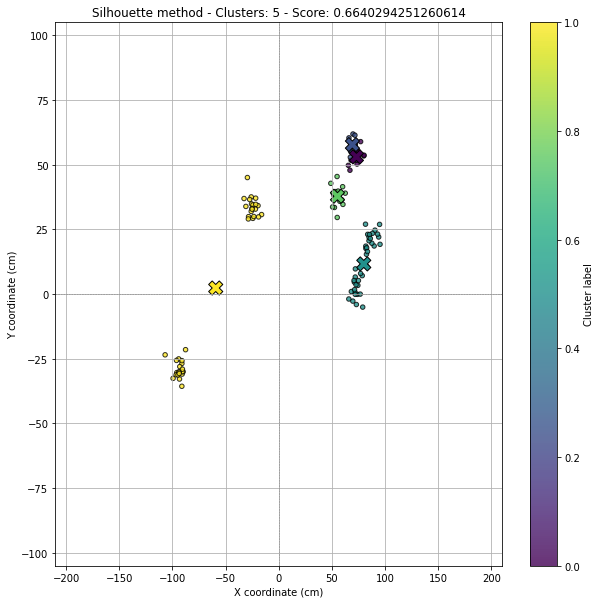

Converged after 5 iterations


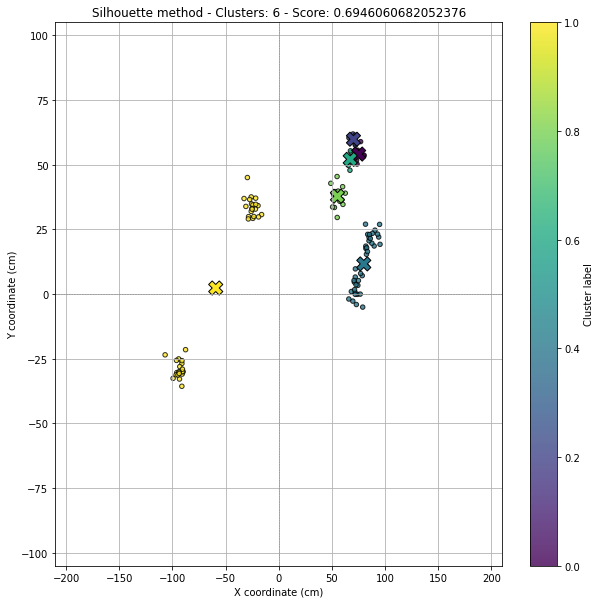

Converged after 5 iterations


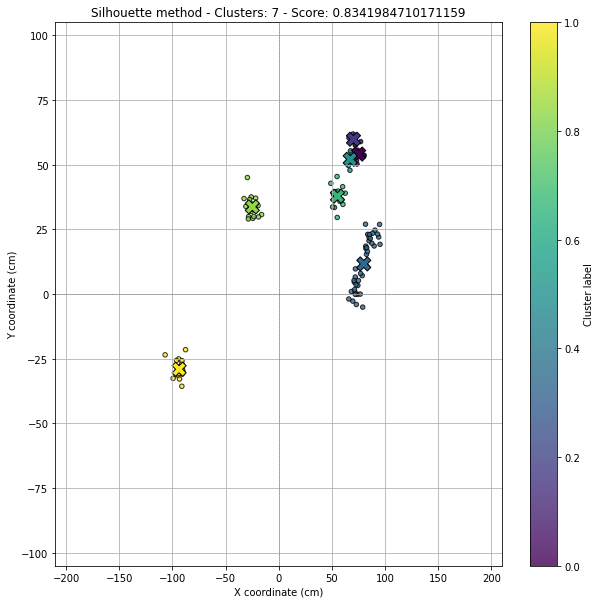

Converged after 5 iterations


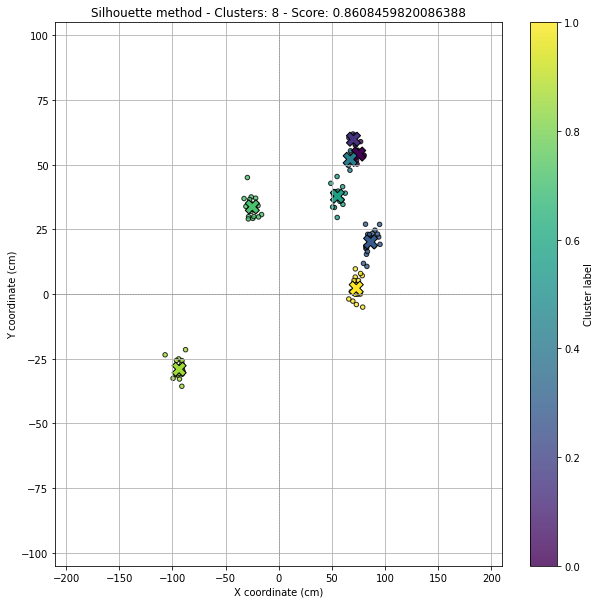

Converged after 5 iterations


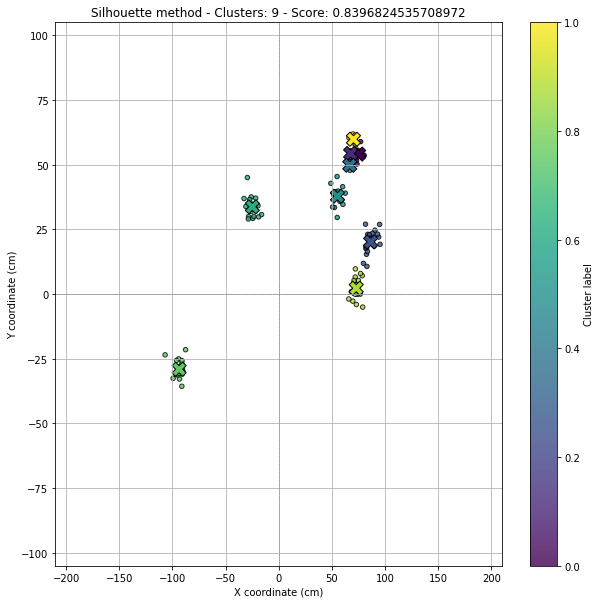

Converged after 5 iterations


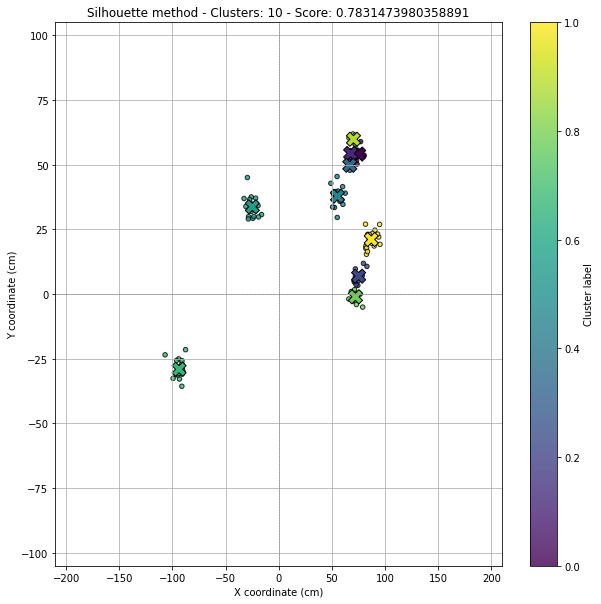

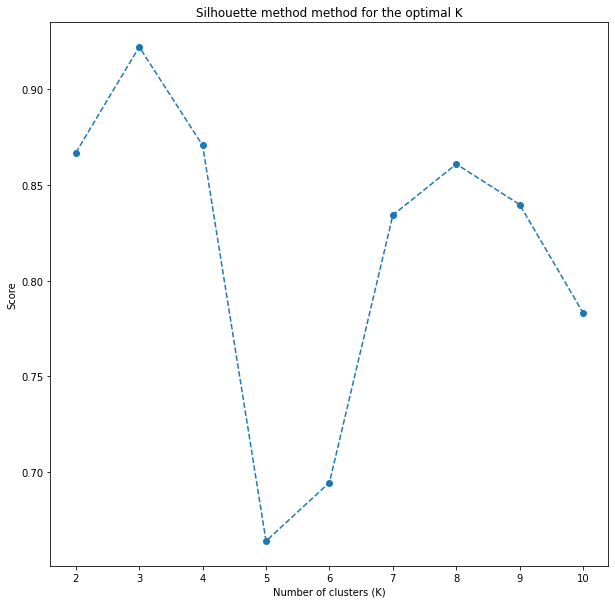

In [18]:
def silhouette_score(data, centroids, labels):
    total_score = 0
    n_samples = data.shape[0]
    k = len(centroids)

    for i in range(n_samples):
        point = data[i]
        point_label = labels[i]

        # Calculate the intra-cluster distance a_i
        same_cluster_points = data[labels == point_label]
        intra_cluster_distances = np.sum((same_cluster_points - point) ** 2, axis=1)
        a_i = np.sum(intra_cluster_distances) / len(same_cluster_points)

        # Calculate the nearest cluster distance b_i
        b_i = float('inf')
        for j in range(k):
            if j == point_label:
                continue  # Skip the same cluster
            other_cluster_points = data[labels == j]
            inter_cluster_distances = np.sum((other_cluster_points - point) ** 2, axis=1)
            nearest_cluster_distance = np.sum(inter_cluster_distances) / len(other_cluster_points)
            if nearest_cluster_distance < b_i:
                b_i = nearest_cluster_distance

        # Calcualte the silhouette hit score s_i
        if max(a_i, b_i) == 0:
            s_i = 0
        else:
            s_i = (b_i - a_i) / max(a_i, b_i)
        total_score += s_i

    # Return the average silhouette score S of the event
    return total_score / n_samples


for n in [2, 4, 6]:
    print('###############################################################################################')
    print(f'Generating {n} clusters...')
    coordinates = generate_2d_points(num_clusters=n, points_per_cluster=20, spread=4., random_seed=999)
    evaluate_method(data=coordinates, score_method=silhouette_score, title_label='Silhouette method', min_k=2, max_k=10)

<div class="alert alert-info">
<strong>Exercise:</strong> 
Implement by yourself a seed-searching algorithm for your K-means algorithm and test it on few events to evaluate its performance. Note that, for this case, you need to use the events from the dielectron sample.</span>

In [19]:
def seed_search(channels, energies, min_energy_threshold=5.0, padding_size=1, n_rows=72, n_columns=36):

    energy_matrix = map_channels_energies_to_matrix(channels, energies, n_rows, n_columns)

    # Step 2: Apply minimum energy threshold to identify potential seed candidates
    energy_mask = energy_matrix > min_energy_threshold
    seed_coordinates = np.argwhere(energy_mask)

    # Step 4: Sort seeds by their energy values (ascending)
    seed_energies = energy_matrix[energy_mask]
    sorted_seeds = sorted(zip(seed_energies, seed_coordinates), key=lambda x: x[0])

    # Step 5: Define a padding region and check for neighboring cells with higher energy
    valid_seeds = []
    for energy, (x, y) in sorted_seeds:
        x_min = max(0, x - padding_size)
        x_max = min(n_rows, x + padding_size + 1)
        y_min = max(0, y - padding_size)
        y_max = min(n_columns, y + padding_size + 1)
        region = energy_matrix[x_min:x_max, y_min:y_max]

        # If any neighboring cell has energy greater than the current seed, discard it
        if np.any(region > energy):
            continue

        channel_id = y * n_columns + x
        valid_seeds.append(channel_id)

    if not valid_seeds:
        return None

    return valid_seeds

# This will be evaluated later :)

<a name='section_3_2'></a>
<hr style="height: 1px;">


## <h3 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #FFA500">Problem 3.3: Putting everything together</h3>

Now that you have mastered the fine art of identifying clusters from a collection of hits, you can use your clustering algorithm over a special dataset of simulated PHENIX EMCal events, where each event has multiple clusters and a lot of noise hits. To get these events (100 in total), execute the following snippet:

```
import exercise3_utils as ex3
elmID, edep = ex3.get_testing_clustering()
```

Note that, in this case, `elmID` and `edep` are arrays of arrays. To get `elmID` and `edep` arrays for the event X (with 0 <= X <= 99), you can simply use `elmID[X]` and `edep[X]`.

<div class="alert alert-info">
<strong>Exercise:</strong> 
Run your clustering algorithm (using your preferred method to find the optimal number of clusters) over few events from the multi-cluster/noisy sample presented above. For each event, plot the clusters found and which hits belong to the cluster. For each cluster found, calculate its position, width and energy.</span>

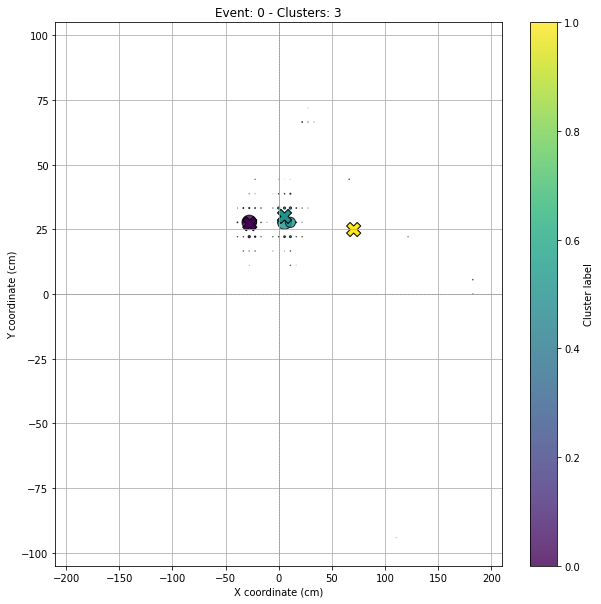

Cluster 0: Energy: 11.765536308288574 GeV
Cluster 1: Energy: 16.203018188476562 GeV
Cluster 2: Energy: 0.0741477906703949 GeV


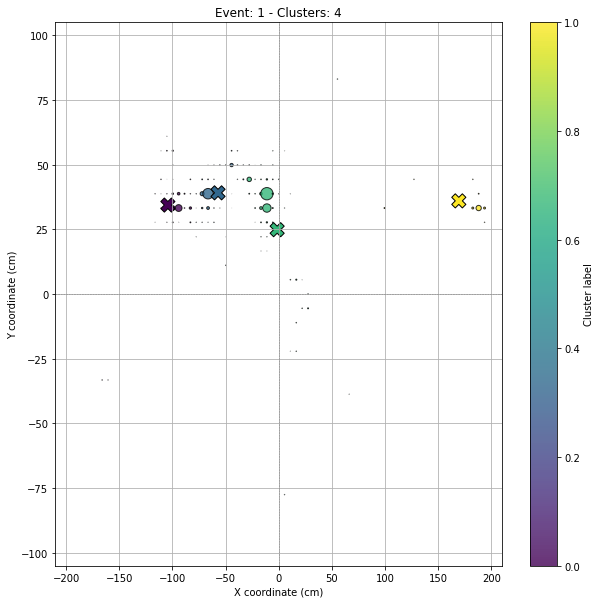

Cluster 0: Energy: 4.442862033843994 GeV
Cluster 1: Energy: 7.65742301940918 GeV
Cluster 2: Energy: 13.557106018066406 GeV
Cluster 3: Energy: 1.8622660636901855 GeV


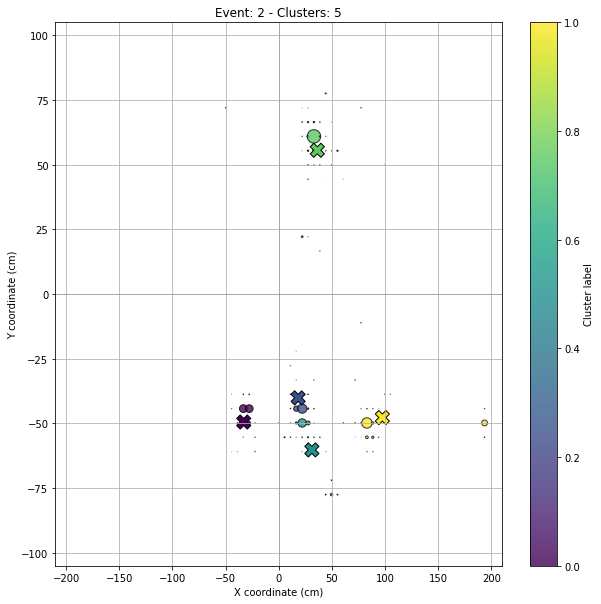

Cluster 0: Energy: 7.174289703369141 GeV
Cluster 1: Energy: 6.207184791564941 GeV
Cluster 2: Energy: 4.909931659698486 GeV
Cluster 3: Energy: 10.643856048583984 GeV
Cluster 4: Energy: 8.102919578552246 GeV


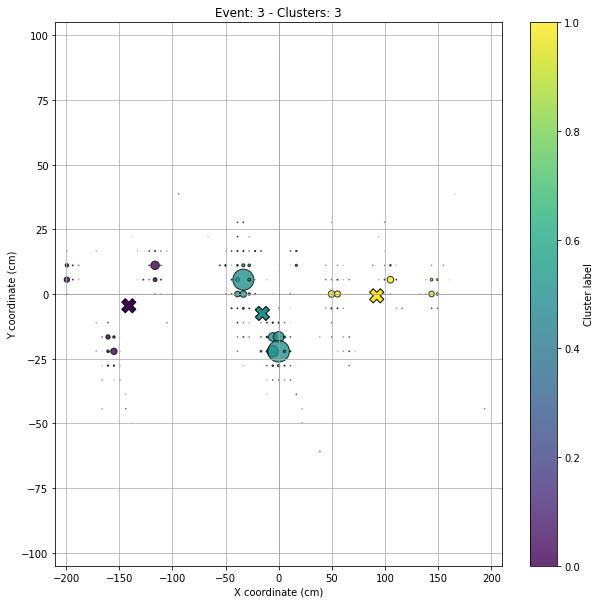

Cluster 0: Energy: 10.64133358001709 GeV
Cluster 1: Energy: 70.33622741699219 GeV
Cluster 2: Energy: 9.269754409790039 GeV


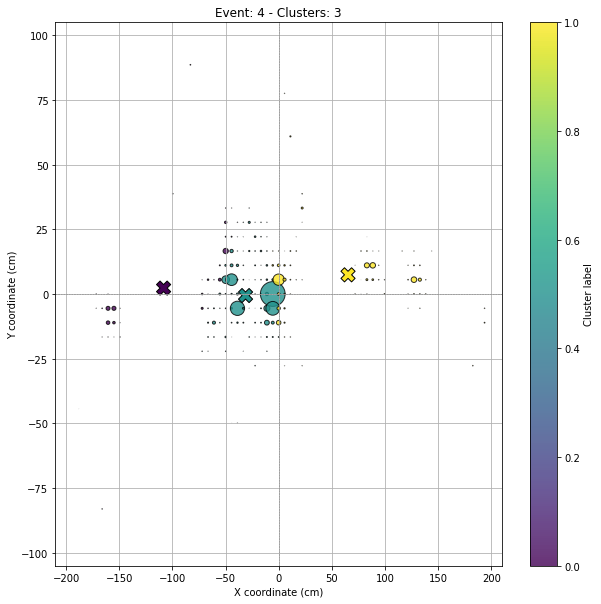

Cluster 0: Energy: 5.421201705932617 GeV
Cluster 1: Energy: 68.73169708251953 GeV
Cluster 2: Energy: 15.506733894348145 GeV


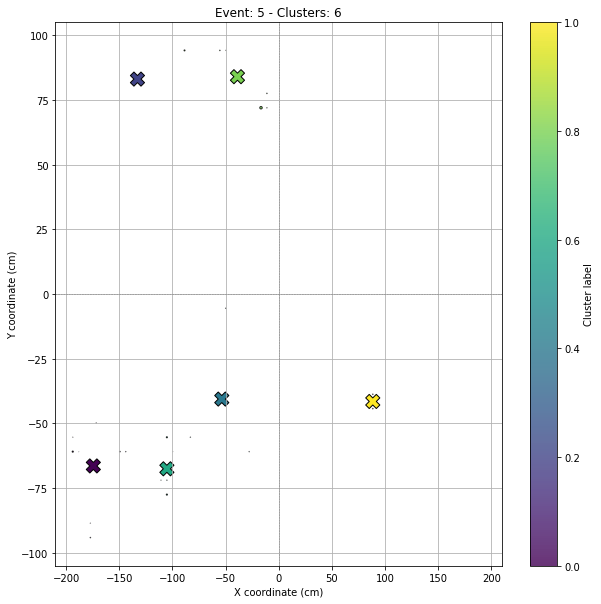

Cluster 0: Energy: 0.12833163142204285 GeV
Cluster 1: Energy: 0.0518597774207592 GeV
Cluster 2: Energy: 0.02002023719251156 GeV
Cluster 3: Energy: 0.13882175087928772 GeV
Cluster 4: Energy: 0.3953229784965515 GeV
Cluster 5: Energy: 0.027090569958090782 GeV


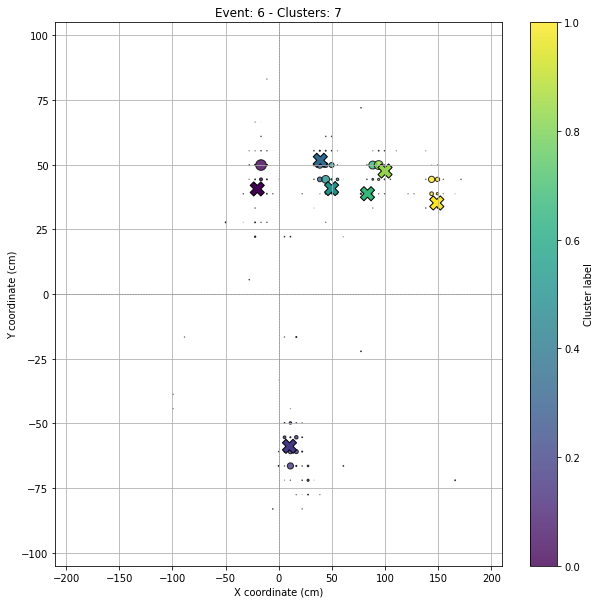

Cluster 0: Energy: 6.780035018920898 GeV
Cluster 1: Energy: 5.9537224769592285 GeV
Cluster 2: Energy: 4.672635555267334 GeV
Cluster 3: Energy: 4.889166355133057 GeV
Cluster 4: Energy: 3.5396244525909424 GeV
Cluster 5: Energy: 4.288034439086914 GeV
Cluster 6: Energy: 3.9573915004730225 GeV
Converged after 2 iterations


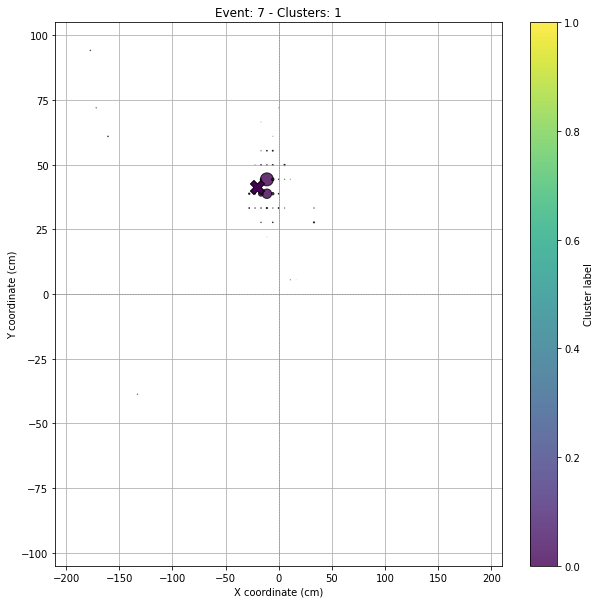

Cluster 0: Energy: 15.523412704467773 GeV


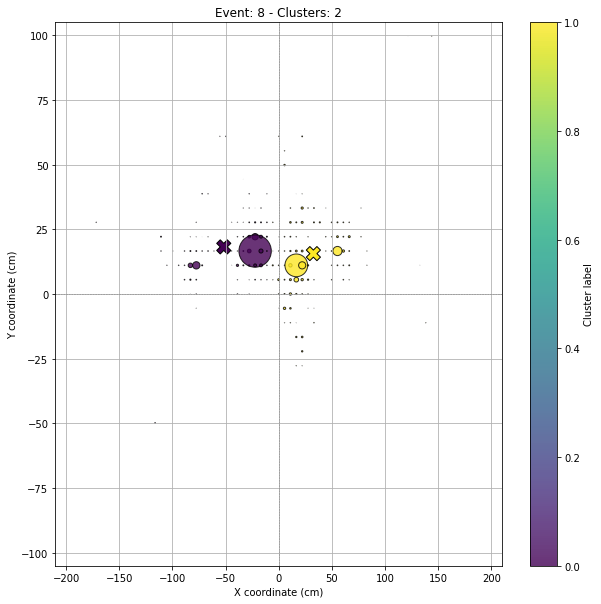

Cluster 0: Energy: 62.69439697265625 GeV
Cluster 1: Energy: 38.731868743896484 GeV


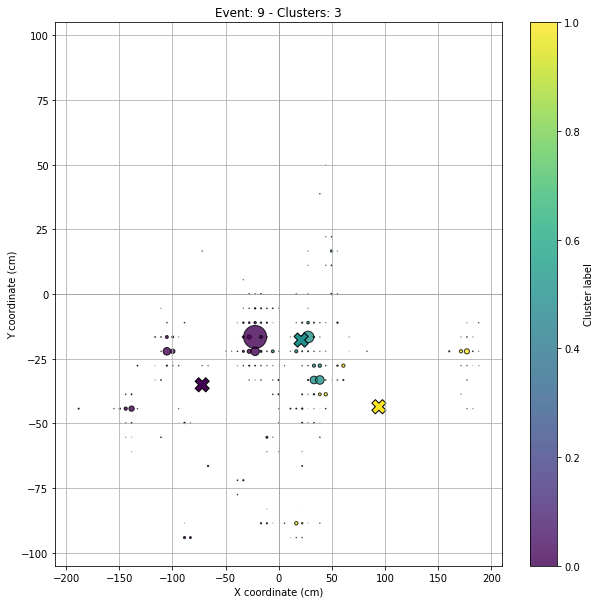

Cluster 0: Energy: 42.134857177734375 GeV
Cluster 1: Energy: 18.185165405273438 GeV
Cluster 2: Energy: 4.556107997894287 GeV


In [20]:
import exercise3_utils as ex3
elmIDs, edeps = ex3.get_testing_clustering()

for i in range(10):
    elmID = elmIDs[i]
    edep = edeps[i] / ex3.sfc
    # Use 5% of total energy in the event as threshold
    min_energy = 0.05 * np.sum(edep)
    seeds = seed_search(elmID, edep, min_energy_threshold=min_energy)
    if seeds:
        seeds_indices = np.where(np.isin(elmID, seeds))[0]
        coordinates = channel_to_spatial_coordinates(elmID)
        centroids, labels = k_means(data=coordinates, k=len(seeds_indices), max_iterations=2, tolerance=1e-4, initial_centroids=seeds_indices)
        plot_spatial_energy_matrix_complex(coordinates, edep, centroids=centroids, labels=labels, title=f'Event: {i} - Clusters: {len(centroids)}')
        unique_labels = np.unique(labels)
        for i, label in enumerate(unique_labels):
            cluster_energy = np.sum(edep[labels == label])
            print(f'Cluster {i}: Energy: {cluster_energy} GeV')
            # Mean and width are trivial